In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import roc_curve, roc_auc_score
import pickle

import warnings
warnings.filterwarnings('ignore')

In [72]:
df =pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Baseball/baseball.csv')
df =df.sample(frac =1)
df.head(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
13,76,656,5544,1379,262,22,198,478,1336,69,726,677,4.16,6,12,45,94
14,68,694,5600,1405,277,46,146,475,1119,78,729,664,4.14,5,15,28,126
12,85,661,5417,1331,243,21,176,435,1150,52,675,630,3.94,2,12,46,93
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
24,63,626,5529,1374,272,37,130,387,1274,88,809,749,4.69,1,7,35,117
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
22,71,613,5463,1420,236,40,120,375,1150,112,678,638,4.02,0,12,35,77
18,68,655,5480,1378,274,34,145,412,1299,84,737,682,4.28,1,7,40,116
11,86,729,5459,1363,278,26,230,486,1392,121,618,572,3.57,5,13,39,85
15,100,647,5484,1386,288,39,137,506,1267,69,525,478,2.94,1,15,62,96


In [73]:
df.shape

(30, 17)

In [74]:
# Checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 13 to 21
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.2 KB


__Dataset has 17 columns, out of which 1 is label and 16 are features. Dataset has not null values__

In [75]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

__There is no null value in the dataset.__

In [76]:
# Checking Statistical information of dataset
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


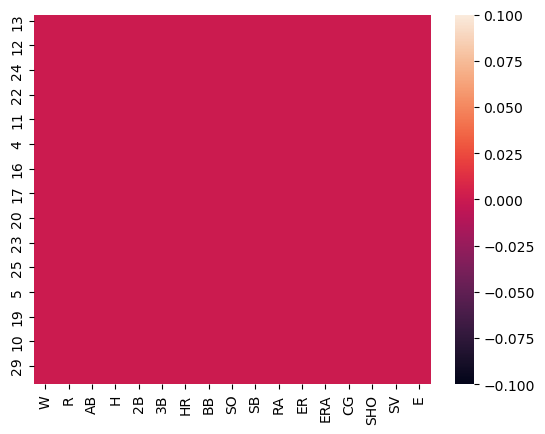

In [77]:
# Visualizing null values using heatmap
sns.heatmap(df.isnull())
plt.show()

__Its clearly visualize there is no null values.__

In [78]:
# Checking count of each column
for i in df:
    print(df[i].value_counts)

<bound method IndexOpsMixin.value_counts of 13     76
14     68
12     85
2      81
24     63
7      81
22     71
18     68
11     86
15    100
4      74
26     84
16     98
8      80
17     97
3      76
20     90
27     79
23     67
6      87
25     92
0      95
5      93
28     74
19     64
9      78
10     88
1      83
29     68
21     83
Name: W, dtype: int64>
<bound method IndexOpsMixin.value_counts of 13    656
14    694
12    661
2     669
24    626
7     713
22    613
18    655
11    729
15    647
4     689
26    696
16    697
8     644
17    689
3     622
20    683
27    720
23    573
6     764
25    667
0     724
5     891
28    650
19    640
9     748
10    751
1     696
29    737
21    703
Name: R, dtype: int64>
<bound method IndexOpsMixin.value_counts of 13    5544
14    5600
12    5417
2     5439
24    5529
7     5485
22    5463
18    5480
11    5459
15    5484
4     5605
26    5565
16    5631
8     5485
17    5491
3     5533
20    5527
27    5649
23    5420
6     5567
25

In [79]:
# Checking unique vaLues in dataset
df.nunique().to_frame("No. of Unique Values")

,No. of Unique Values
W,24
R,28
AB,29
H,29
2B,22
3B,23
HR,27
BB,29
SO,29
SB,27


In [80]:
# Checking duplicate values
df[df.duplicated()]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


__No duplicate record found.__

## Data Visualization

### Unvariate Analysis

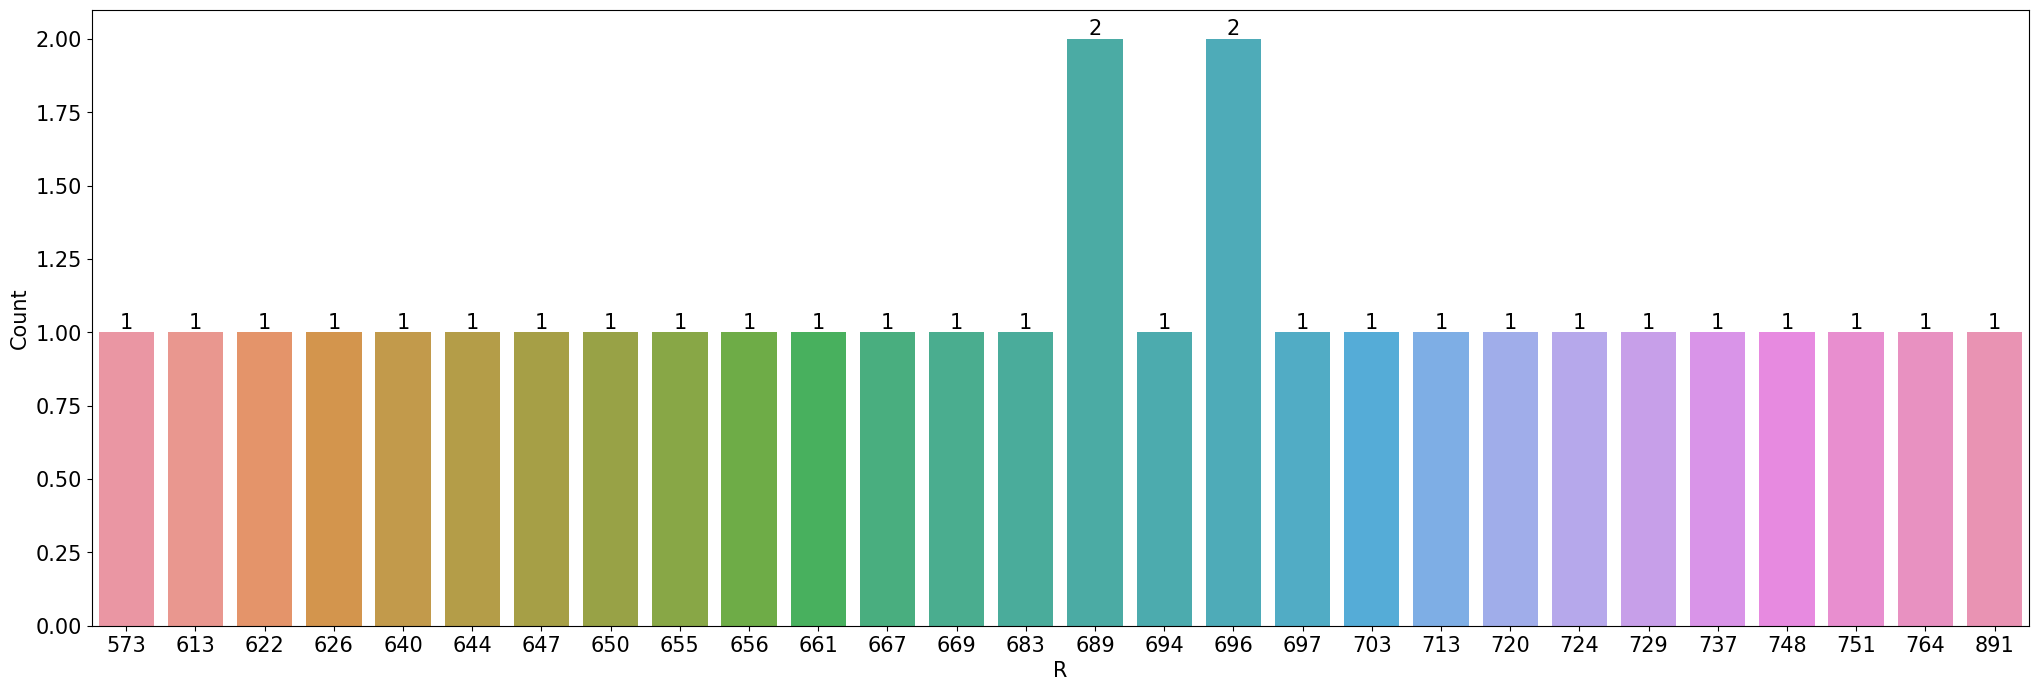

In [81]:
plt.figure(figsize =(25,8))
ax =sns.countplot(x ='R', data =df)
ax.bar_label(ax.containers[0], fontsize =15)
plt.xlabel("R", fontsize =15)
plt.ylabel('Count', fontsize =15)
plt.yticks(fontsize =15)
plt.xticks(fontsize =15)
plt.show()

__All frequency are same except '689' and '696'.__

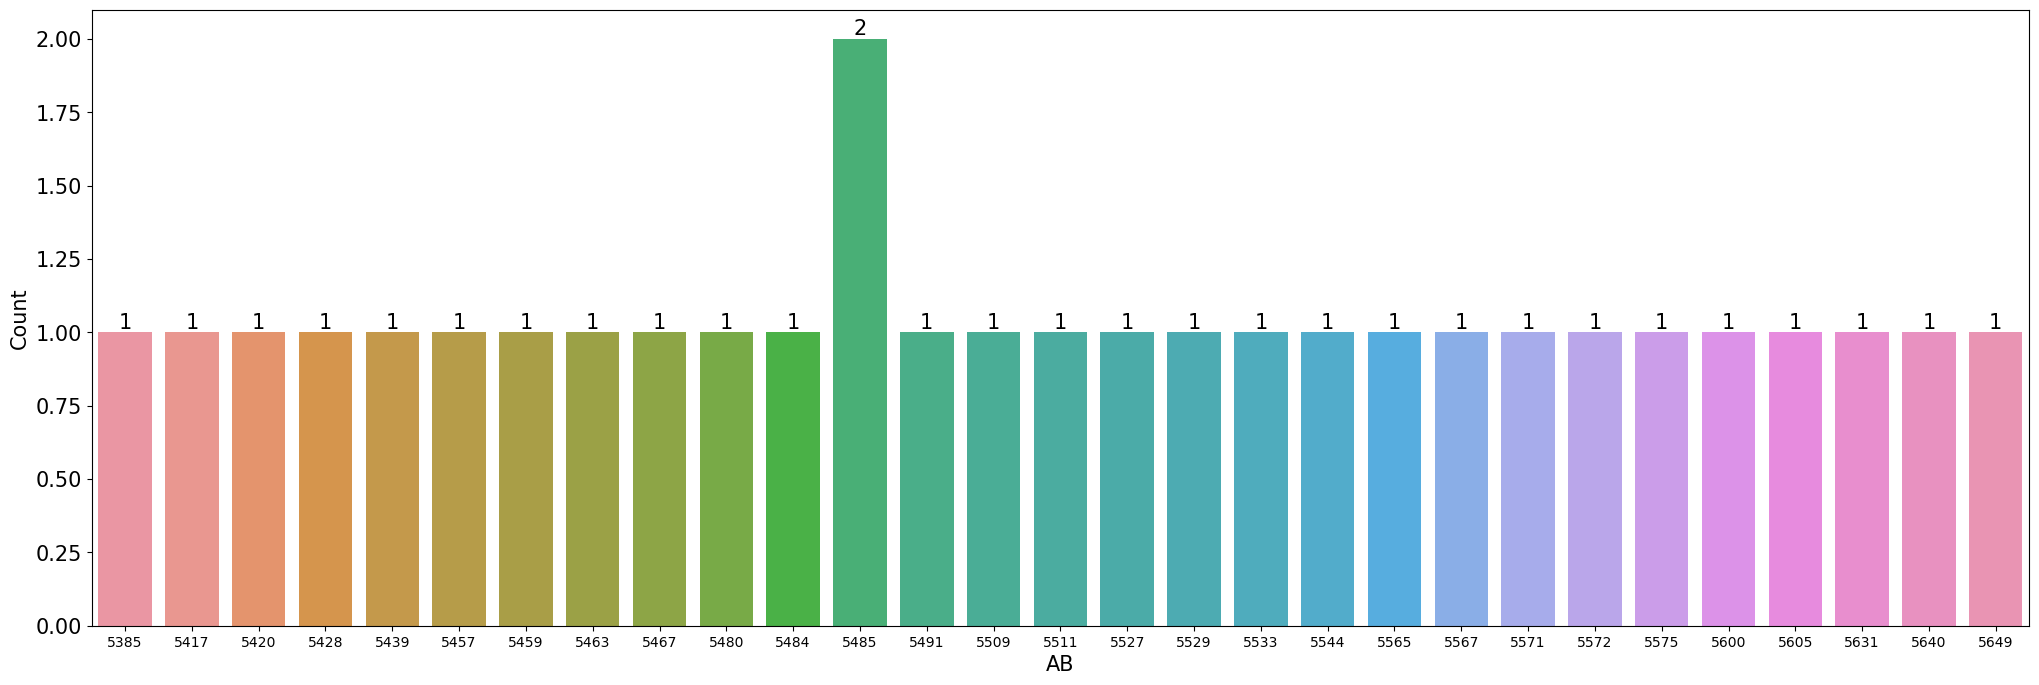

In [82]:
plt.figure(figsize =(25,8))
ax =sns.countplot(x ='AB', data =df)
ax.bar_label(ax.containers[0], fontsize =15)
plt.xlabel("AB", fontsize =15)
plt.ylabel('Count', fontsize =15)
plt.yticks(fontsize =15)
plt.show()

__Frequency of all the numbers are same except '5484'.__

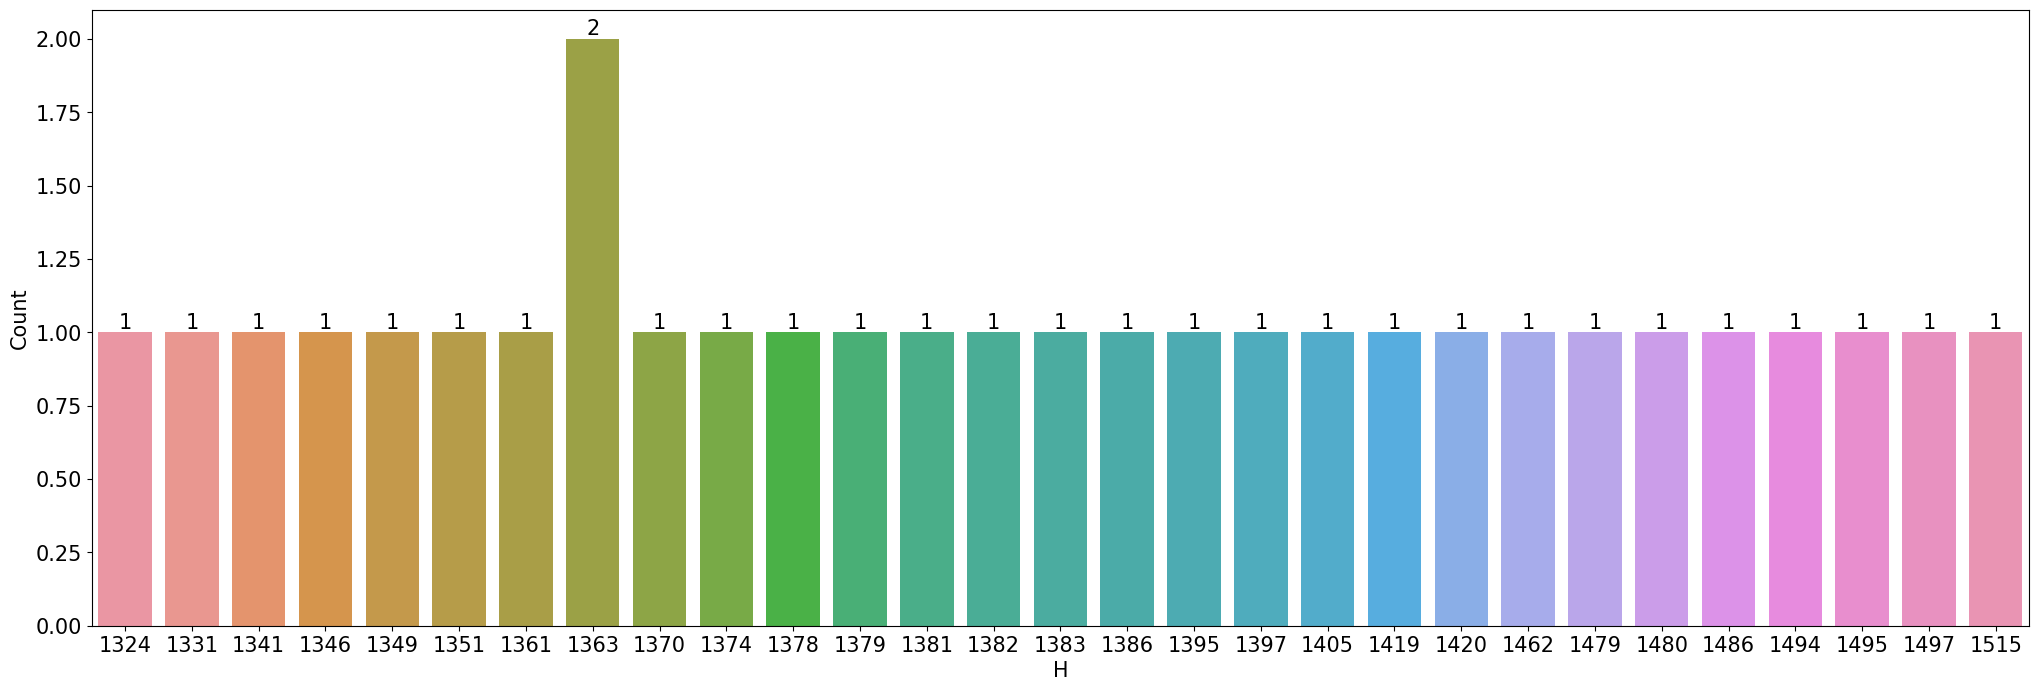

In [83]:
plt.figure(figsize =(25,8))
ax =sns.countplot(x ='H', data =df)
ax.bar_label(ax.containers[0], fontsize =15)
plt.xlabel("H", fontsize =15)
plt.ylabel('Count', fontsize =15)
plt.yticks(fontsize =15)
plt.xticks(fontsize =15)
plt.show()

2B
272    3
274    2
278    2
288    2
289    2
277    2
260    2
262    1
263    1
279    1
294    1
257    1
308    1
300    1
292    1
251    1
295    1
236    1
246    1
303    1
243    1
265    1
Name: count, dtype: int64


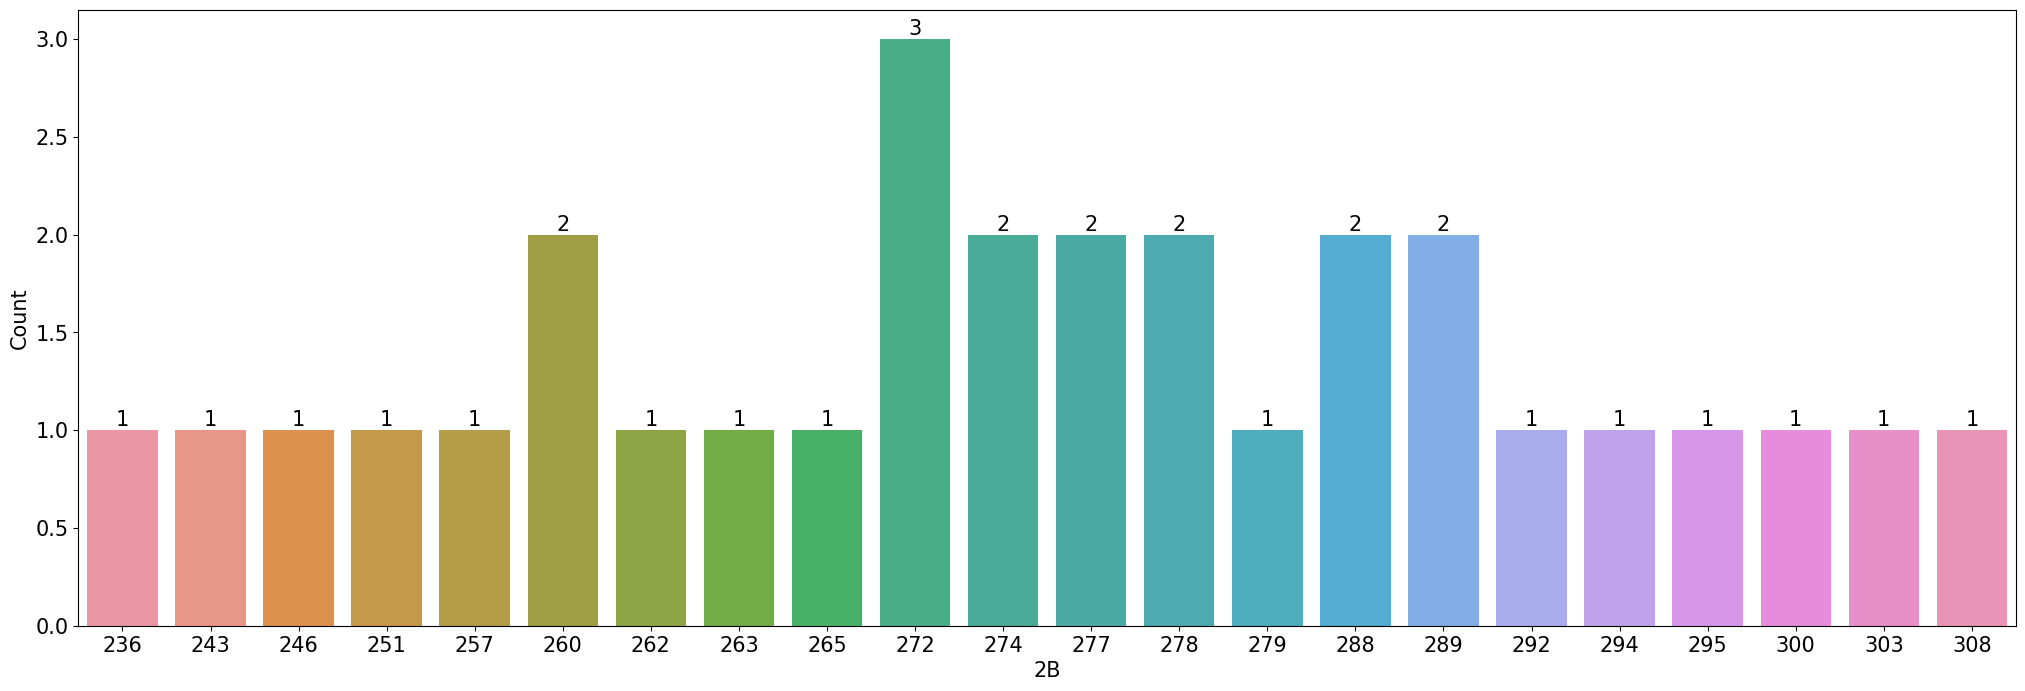

In [84]:
plt.figure(figsize =(25,8))
ax =sns.countplot(x ='2B', data =df)
ax.bar_label(ax.containers[0], fontsize =15)
plt.xlabel("2B", fontsize =15)
plt.ylabel('Count', fontsize =15)
plt.yticks(fontsize =15)
plt.xticks(fontsize =15)
print(df['2B'].value_counts())

3B
27    3
17    2
26    2
39    2
49    2
32    2
44    1
33    1
36    1
42    1
19    1
18    1
48    1
22    1
30    1
46    1
34    1
40    1
20    1
37    1
29    1
21    1
13    1
Name: count, dtype: int64


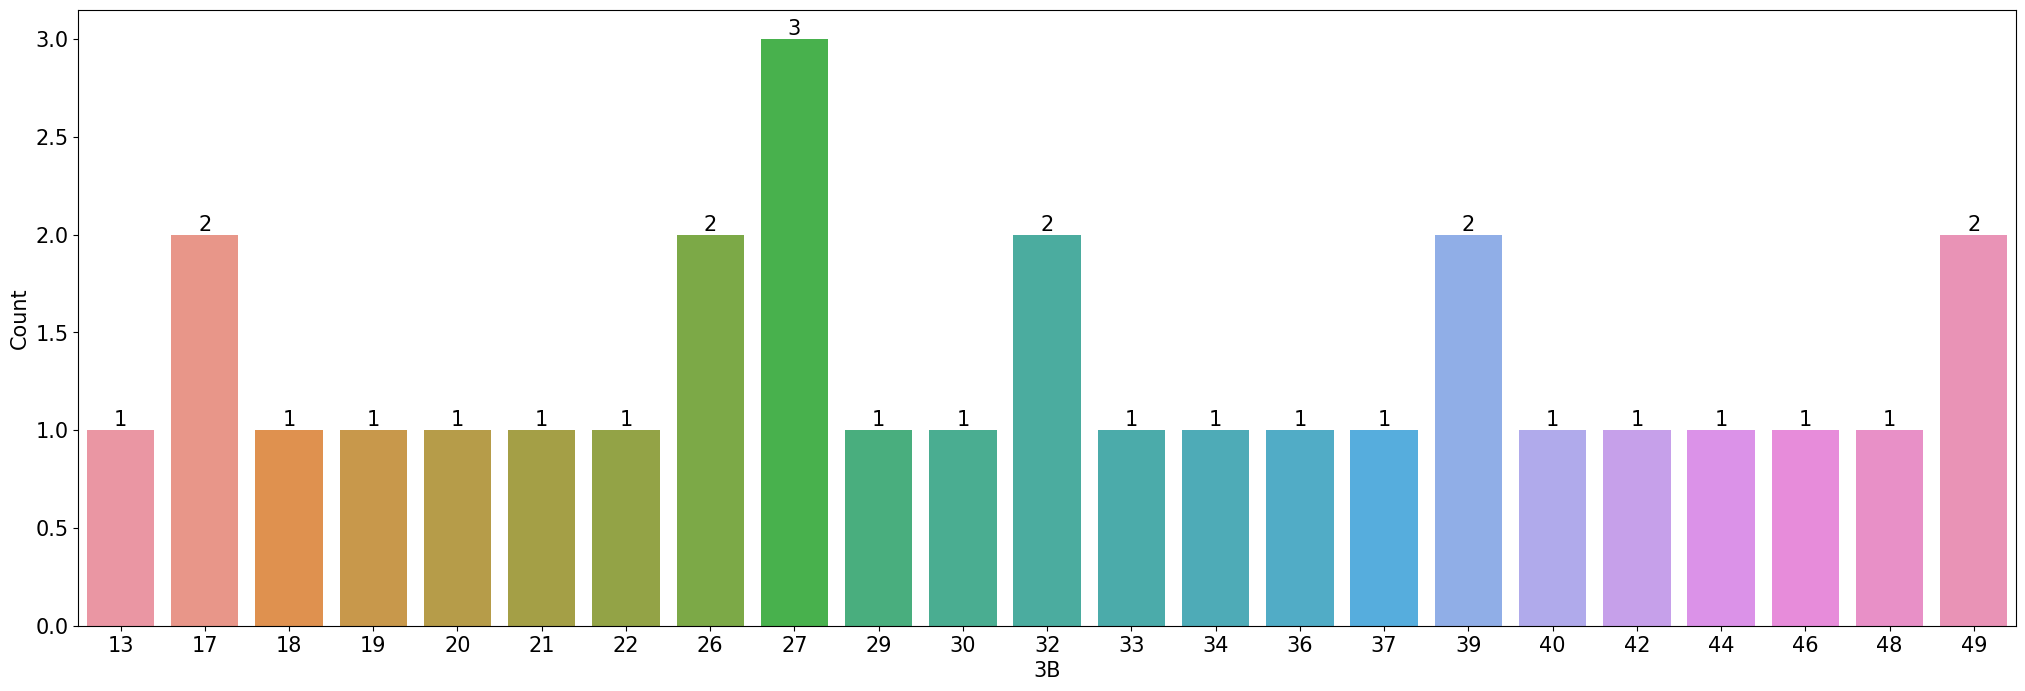

In [85]:
plt.figure(figsize =(25,8))
ax =sns.countplot(x ='3B', data =df)
ax.bar_label(ax.containers[0], fontsize =15)
plt.xlabel("3B", fontsize =15)
plt.ylabel('Count', fontsize =15)
plt.yticks(fontsize =15)
plt.xticks(fontsize =15)
print(df['3B'].value_counts())

HR
167    2
136    2
177    2
171    1
156    1
172    1
161    1
148    1
232    1
139    1
187    1
212    1
100    1
154    1
198    1
146    1
140    1
151    1
137    1
230    1
145    1
120    1
217    1
130    1
141    1
176    1
186    1
Name: count, dtype: int64


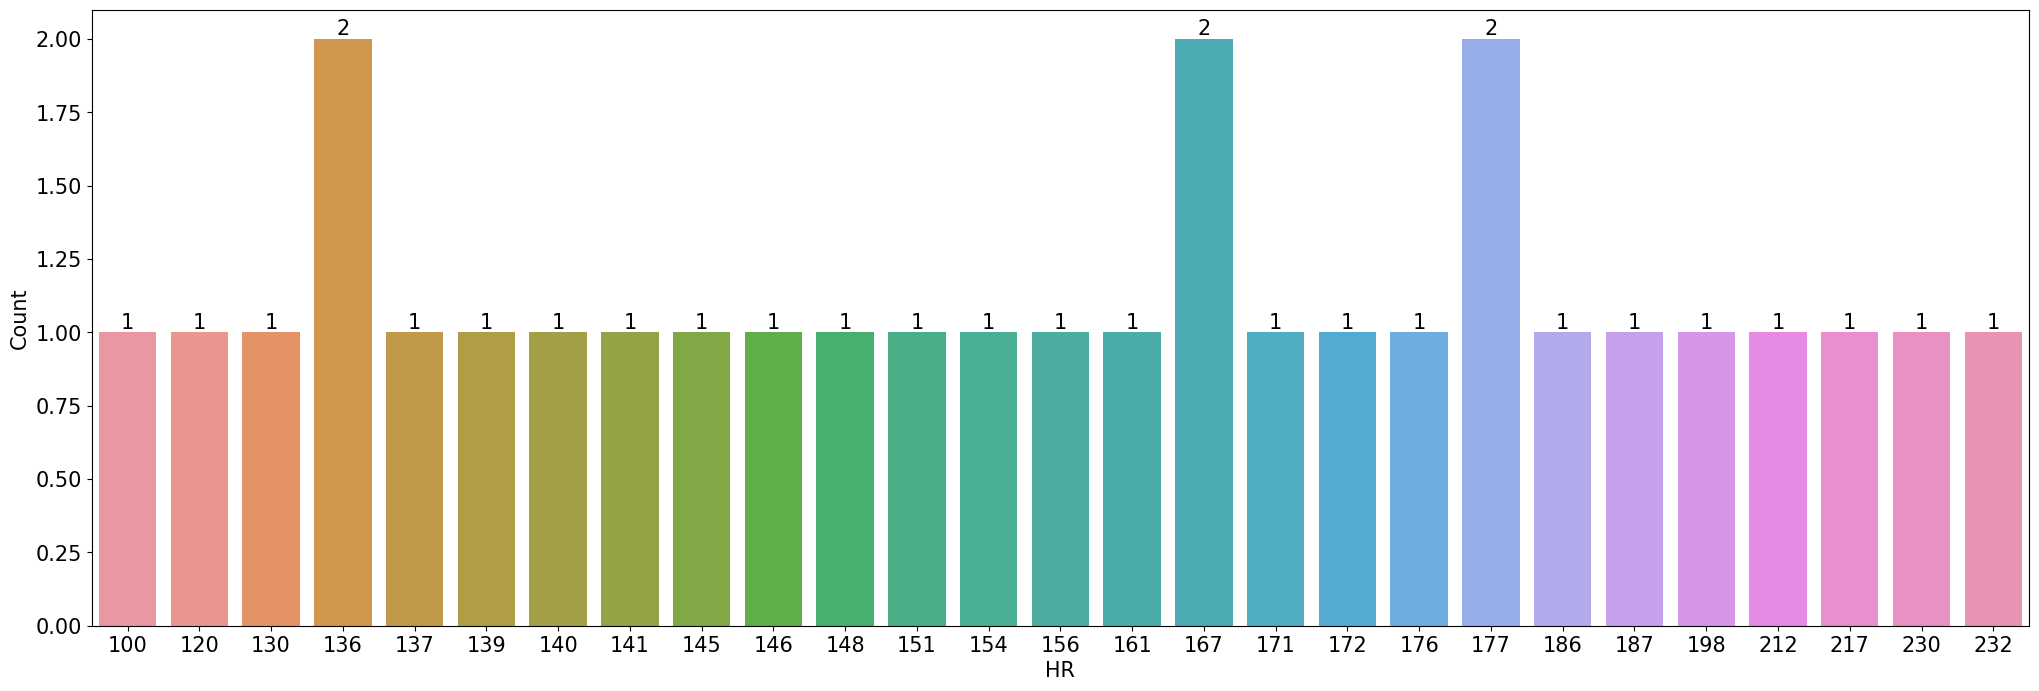

In [86]:
plt.figure(figsize =(25,8))
ax =sns.countplot(x ='HR', data =df)
ax.bar_label(ax.containers[0], fontsize =15)
plt.xlabel("HR", fontsize =15)
plt.ylabel('Count', fontsize =15)
plt.yticks(fontsize =15)
plt.xticks(fontsize =15)
print(df['HR'].value_counts())

BB
478    2
404    1
388    1
439    1
503    1
496    1
426    1
570    1
383    1
563    1
554    1
471    1
490    1
488    1
567    1
475    1
436    1
461    1
457    1
455    1
506    1
486    1
412    1
375    1
418    1
387    1
533    1
435    1
539    1
Name: count, dtype: int64


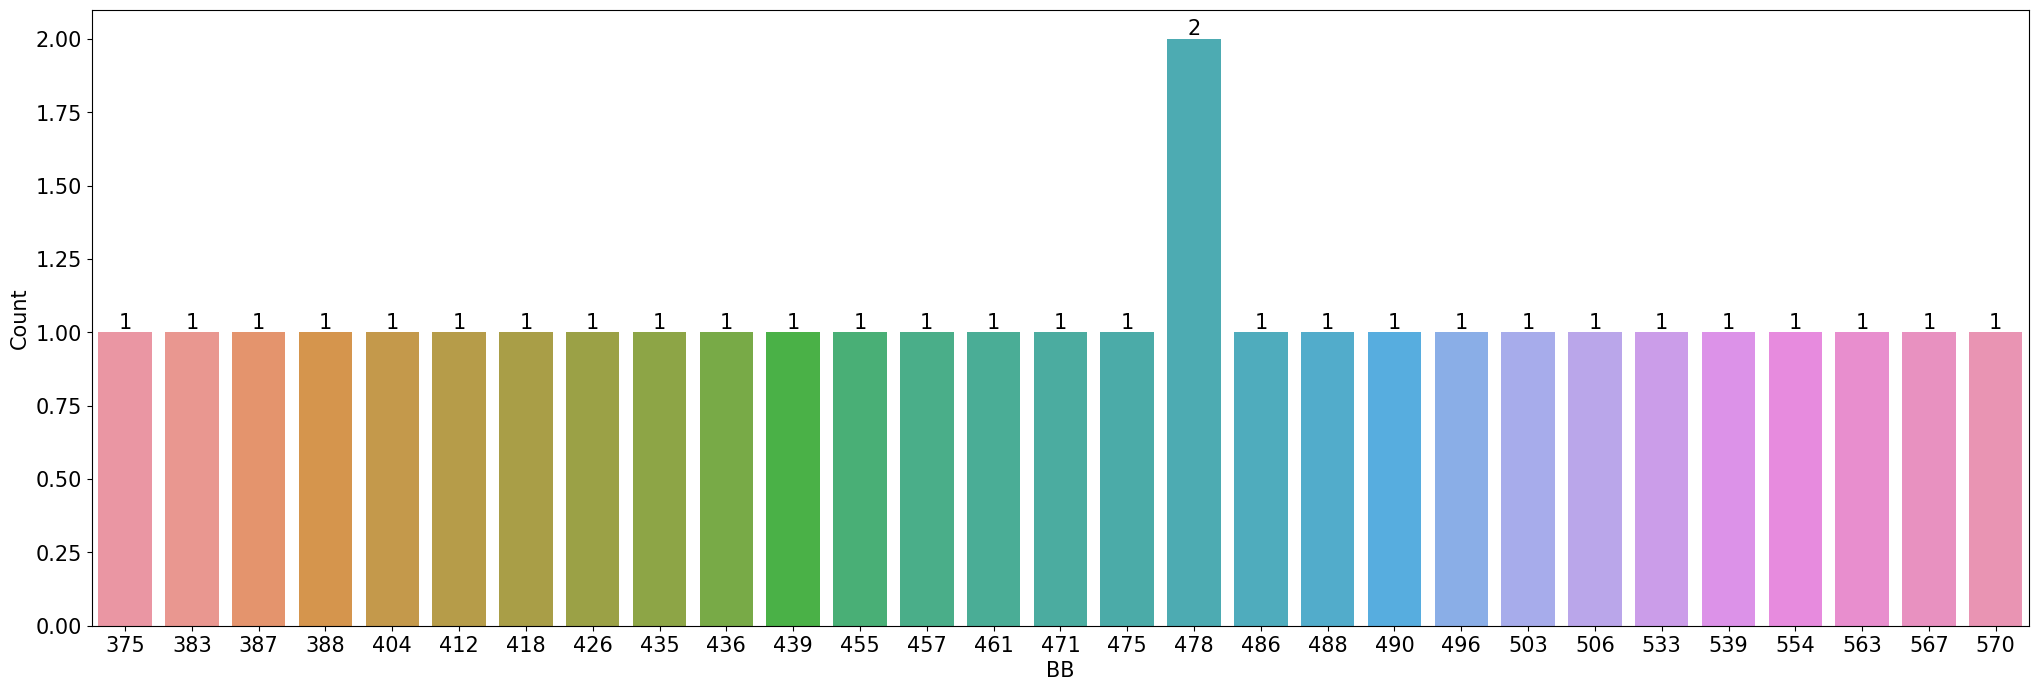

In [87]:
plt.figure(figsize =(25,8))
ax =sns.countplot(x ='BB', data =df)
ax.bar_label(ax.containers[0], fontsize =15)
plt.xlabel("BB", fontsize =15)
plt.ylabel('Count', fontsize =15)
plt.yticks(fontsize =15)
plt.xticks(fontsize =15)
print(df['BB'].value_counts())

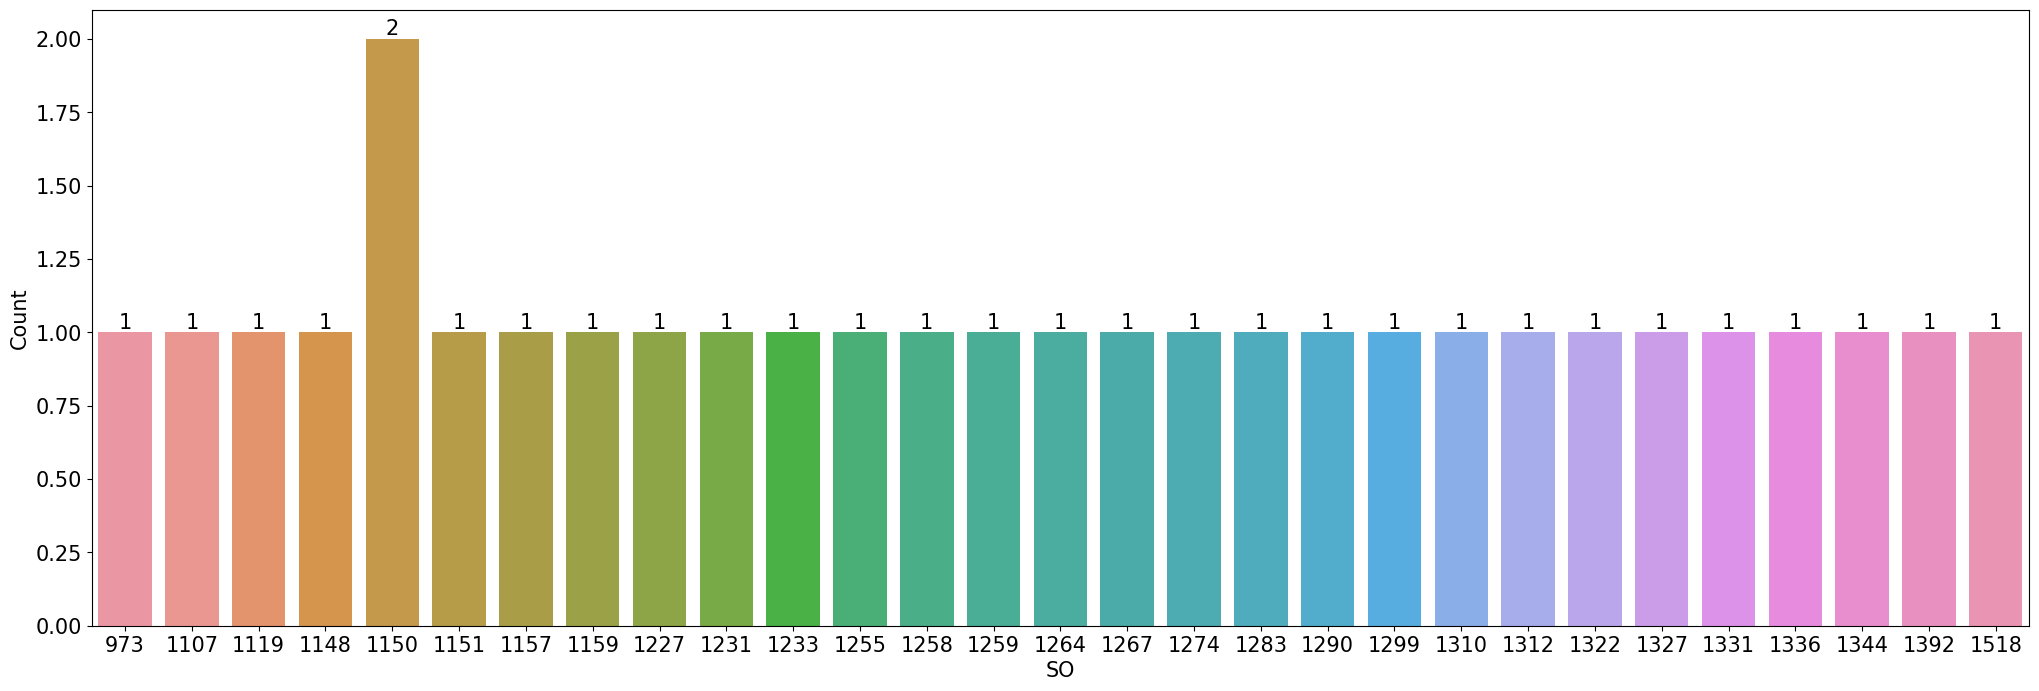

In [88]:
plt.figure(figsize =(25,8))
ax =sns.countplot(x ='SO', data =df)
ax.bar_label(ax.containers[0], fontsize =15)
plt.xlabel("SO", fontsize =15)
plt.ylabel('Count', fontsize =15)
plt.yticks(fontsize =15)
plt.xticks(fontsize =15)
plt.show()

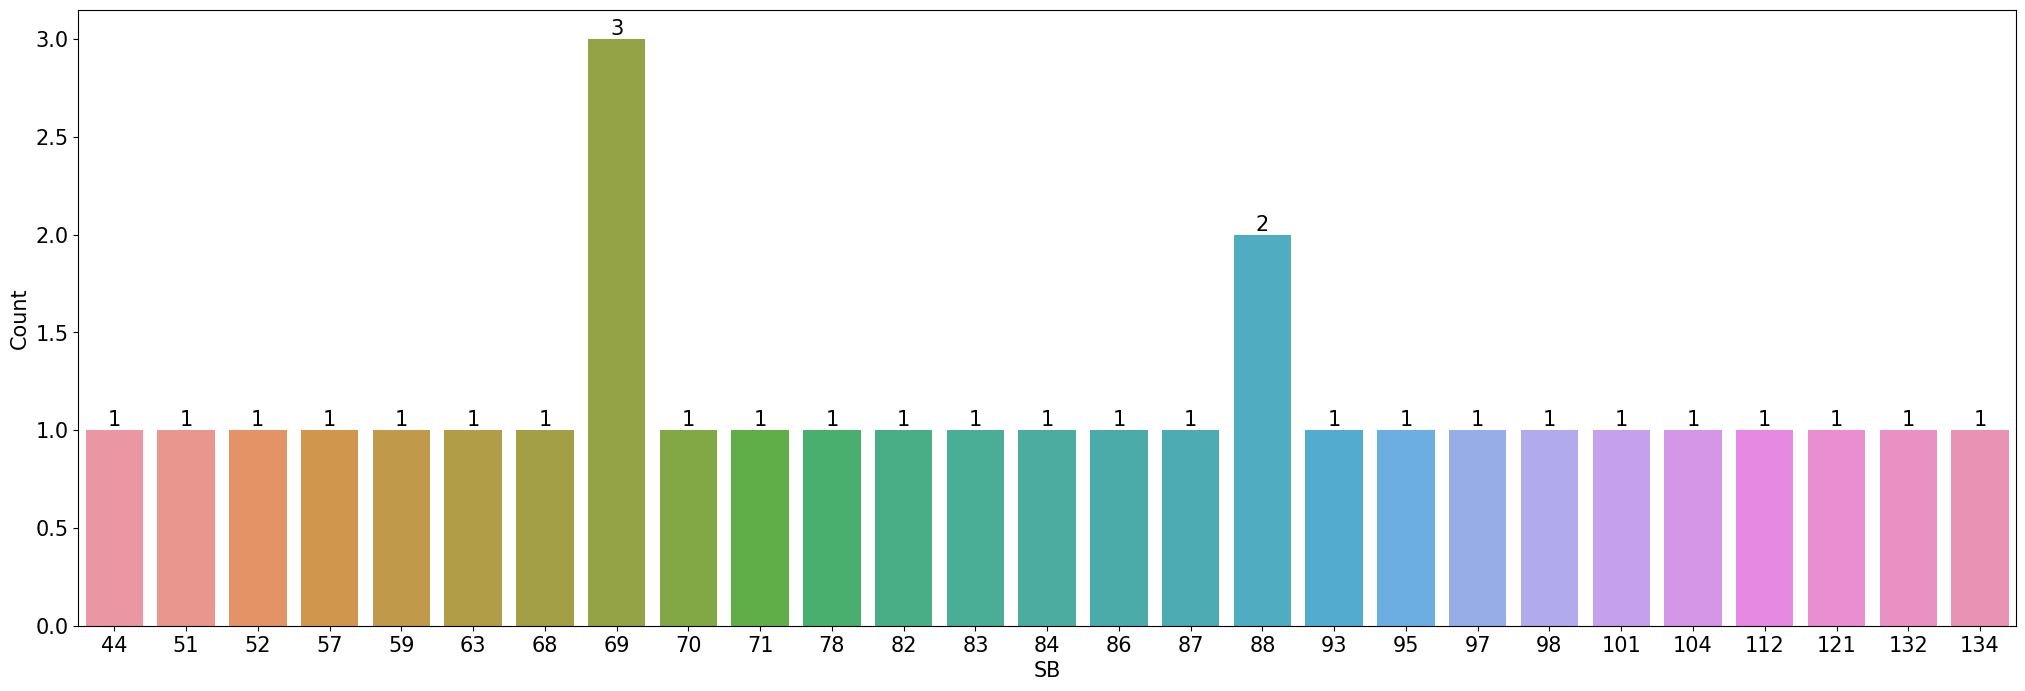

In [89]:
plt.figure(figsize =(25,8))
ax =sns.countplot(x ='SB', data =df)
ax.bar_label(ax.containers[0], fontsize =15)
plt.xlabel("SB", fontsize =15)
plt.ylabel('Count', fontsize =15)
plt.yticks(fontsize =15)
plt.xticks(fontsize =15)
plt.show()

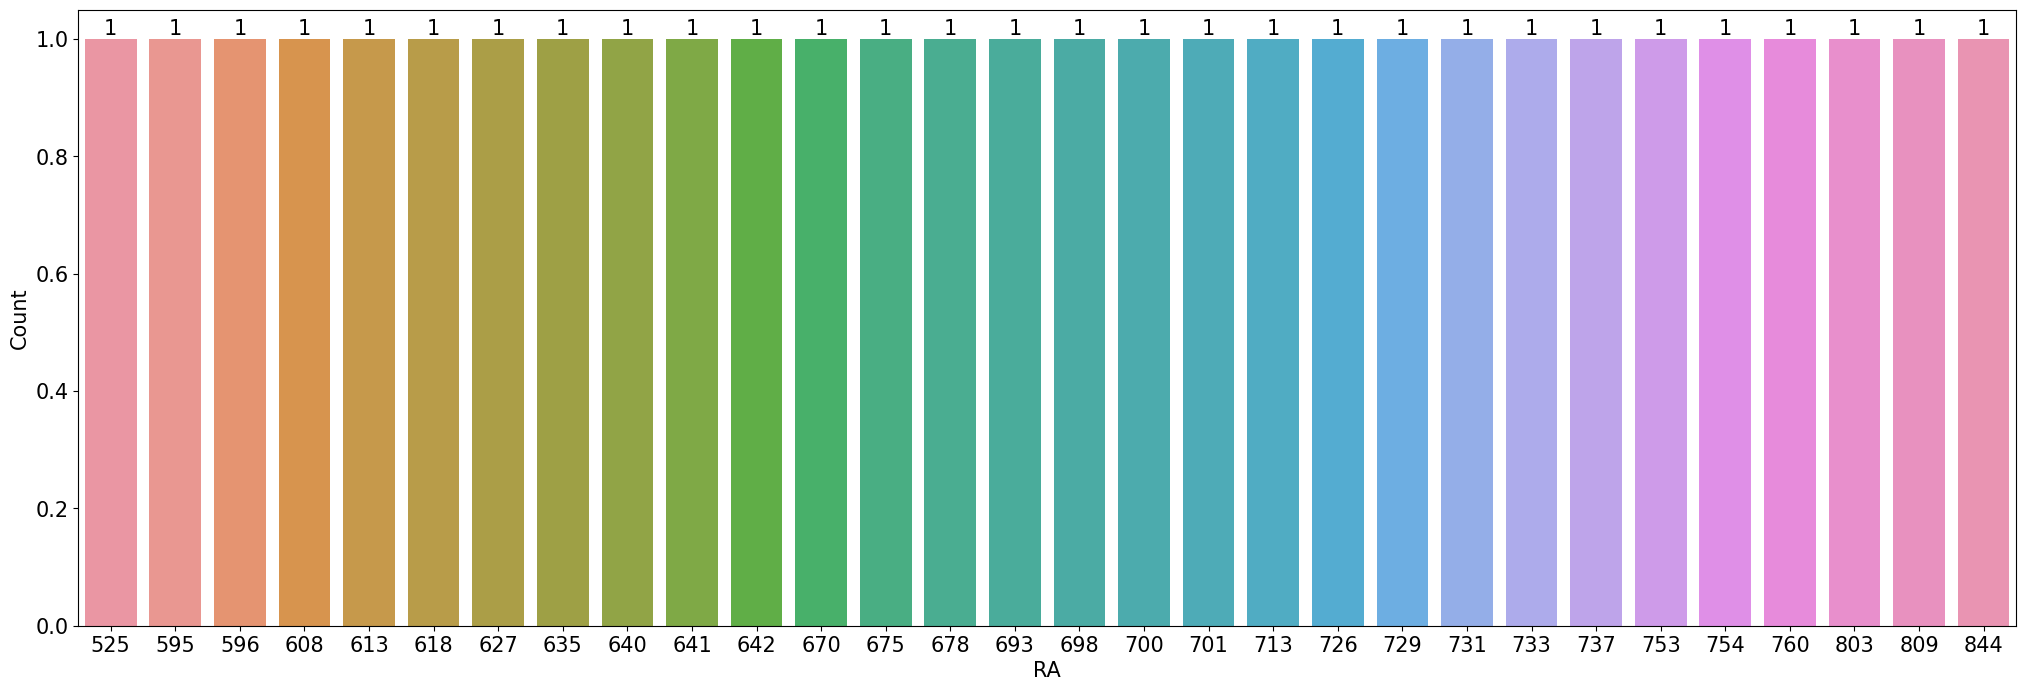

In [90]:
plt.figure(figsize =(25,8))
ax =sns.countplot(x ='RA', data =df)
ax.bar_label(ax.containers[0], fontsize =15)
plt.xlabel("RA", fontsize =15)
plt.ylabel('Count', fontsize =15)
plt.yticks(fontsize =15)
plt.xticks(fontsize =15)
plt.show()

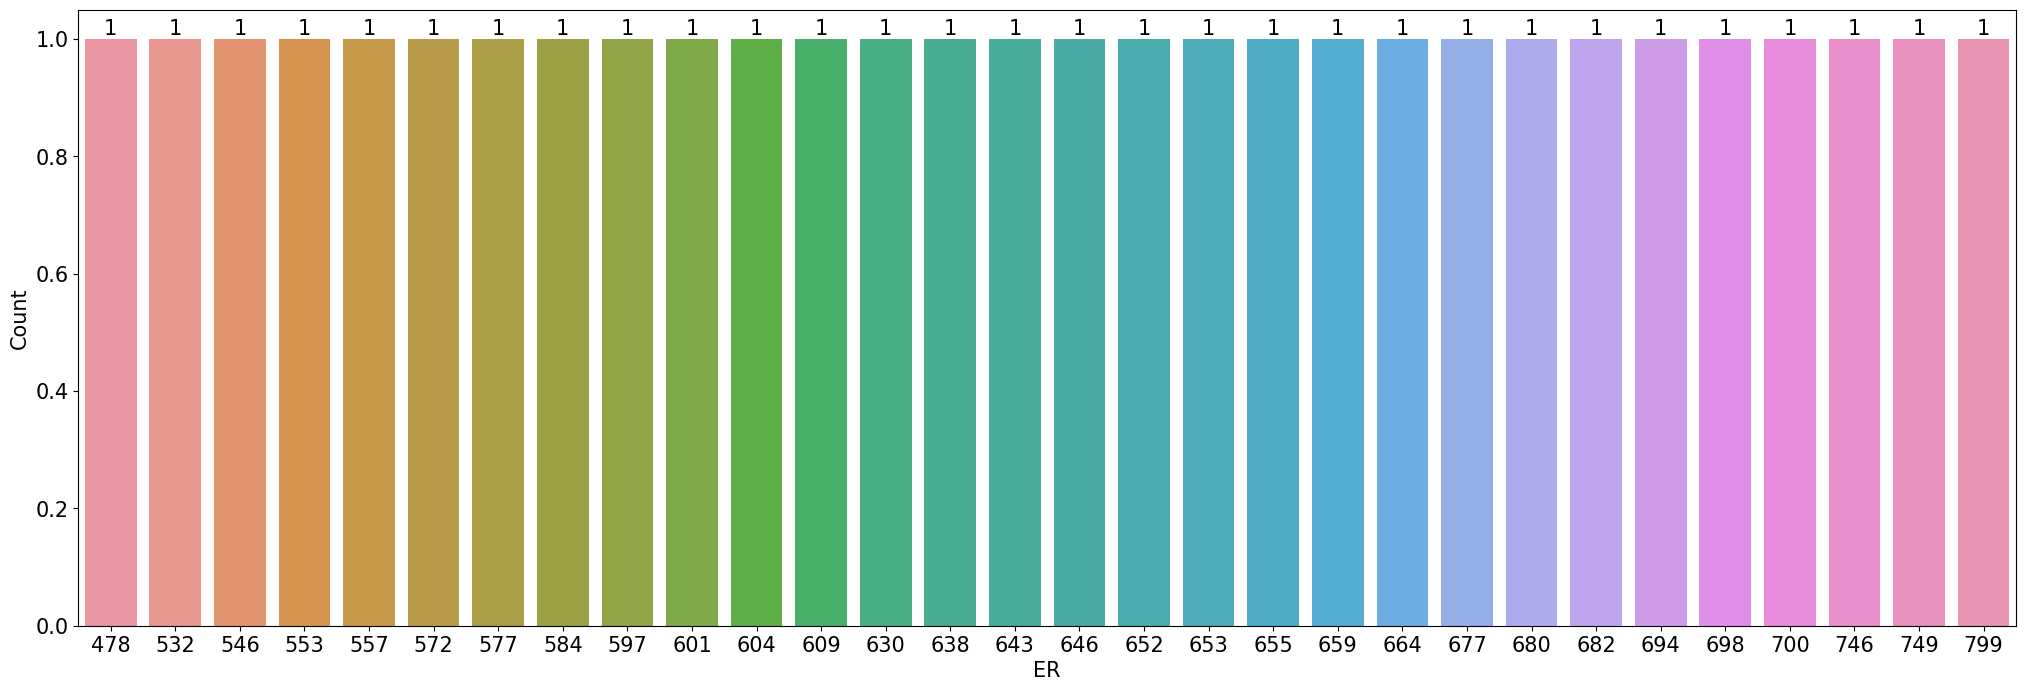

In [91]:
plt.figure(figsize =(25,8))
ax =sns.countplot(x ='ER', data =df)
ax.bar_label(ax.containers[0], fontsize =15)
plt.xlabel("ER", fontsize =15)
plt.ylabel('Count', fontsize =15)
plt.yticks(fontsize =15)
plt.xticks(fontsize =15)
plt.show()

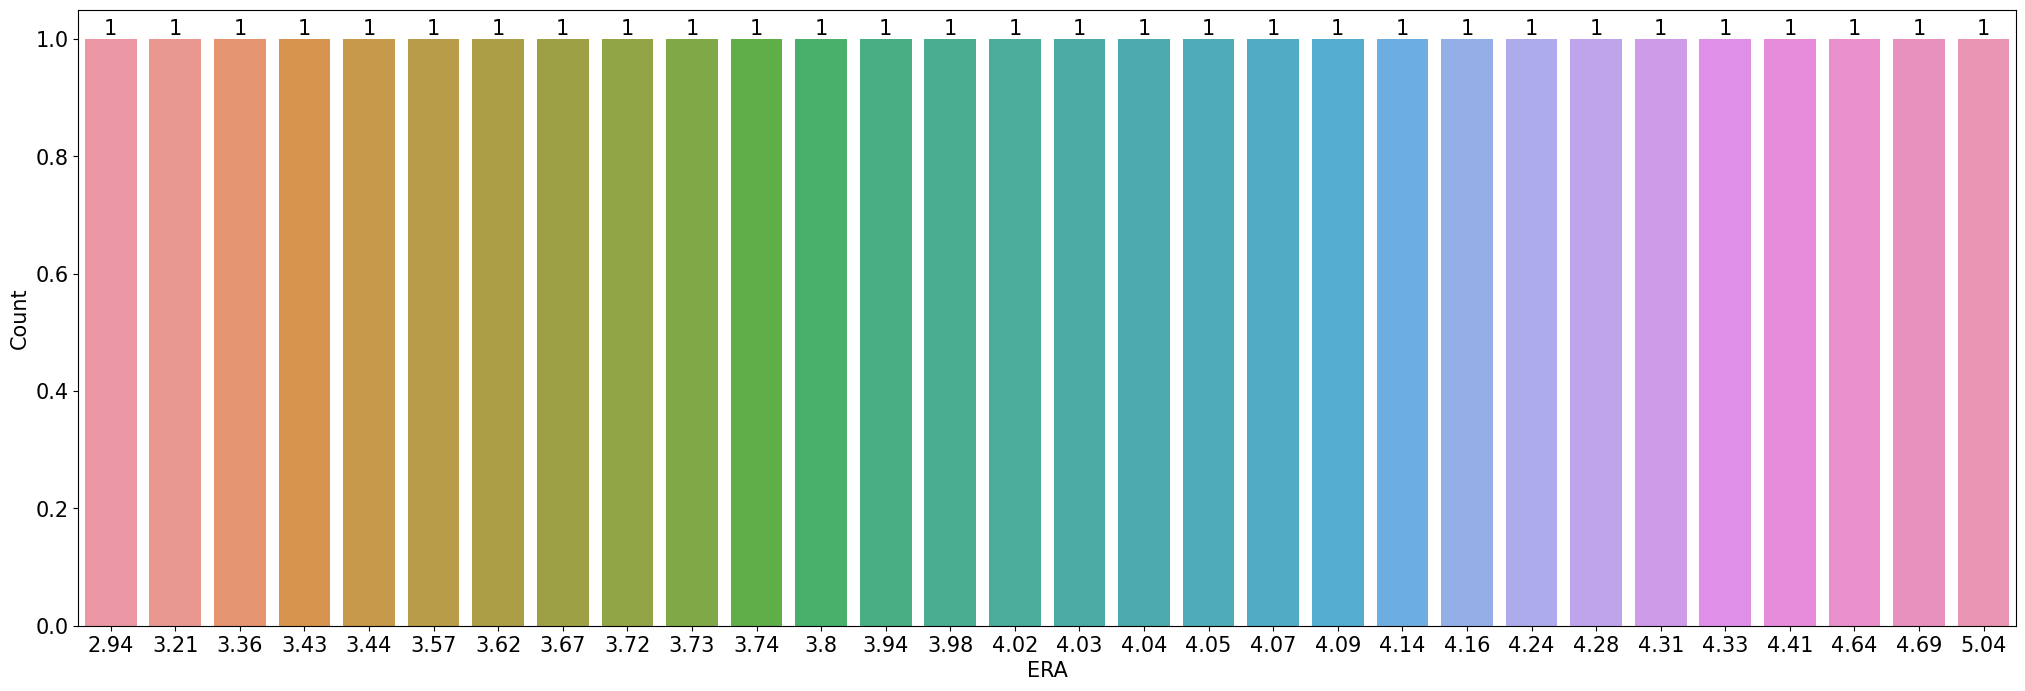

In [92]:
plt.figure(figsize =(25,8))
ax =sns.countplot(x ='ERA', data =df)
ax.bar_label(ax.containers[0], fontsize =15)
plt.xlabel("ERA", fontsize =15)
plt.ylabel('Count', fontsize =15)
plt.yticks(fontsize =15)
plt.xticks(fontsize =15)
plt.show()

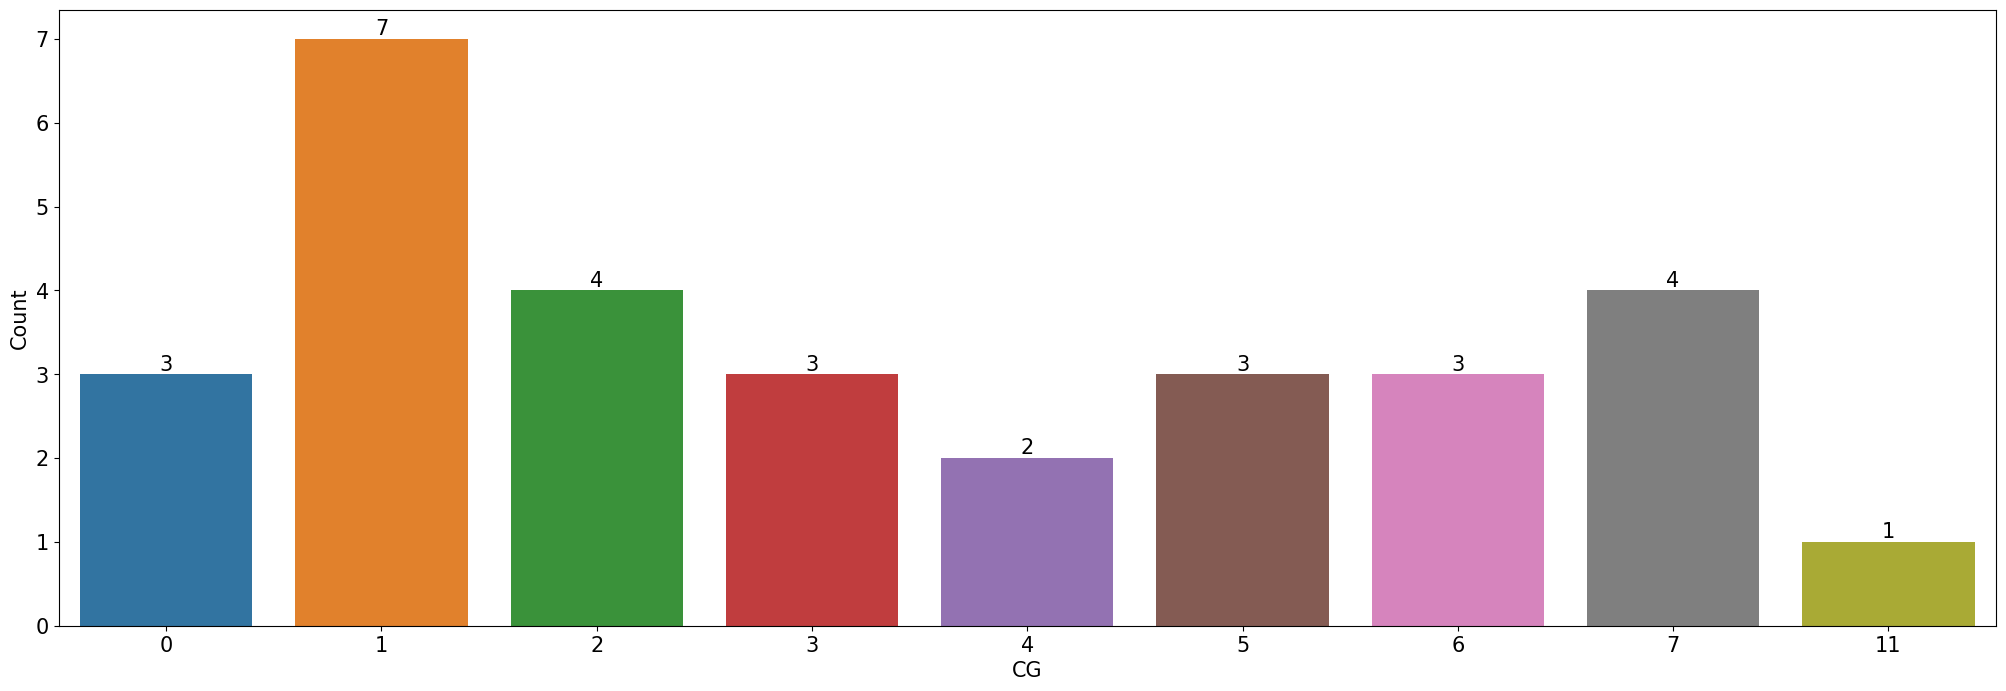

In [93]:
plt.figure(figsize =(25,8))
ax =sns.countplot(x ='CG', data =df)
ax.bar_label(ax.containers[0], fontsize =15)
plt.xlabel("CG", fontsize =15)
plt.ylabel('Count', fontsize =15)
plt.yticks(fontsize =15)
plt.xticks(fontsize =15)
plt.show()

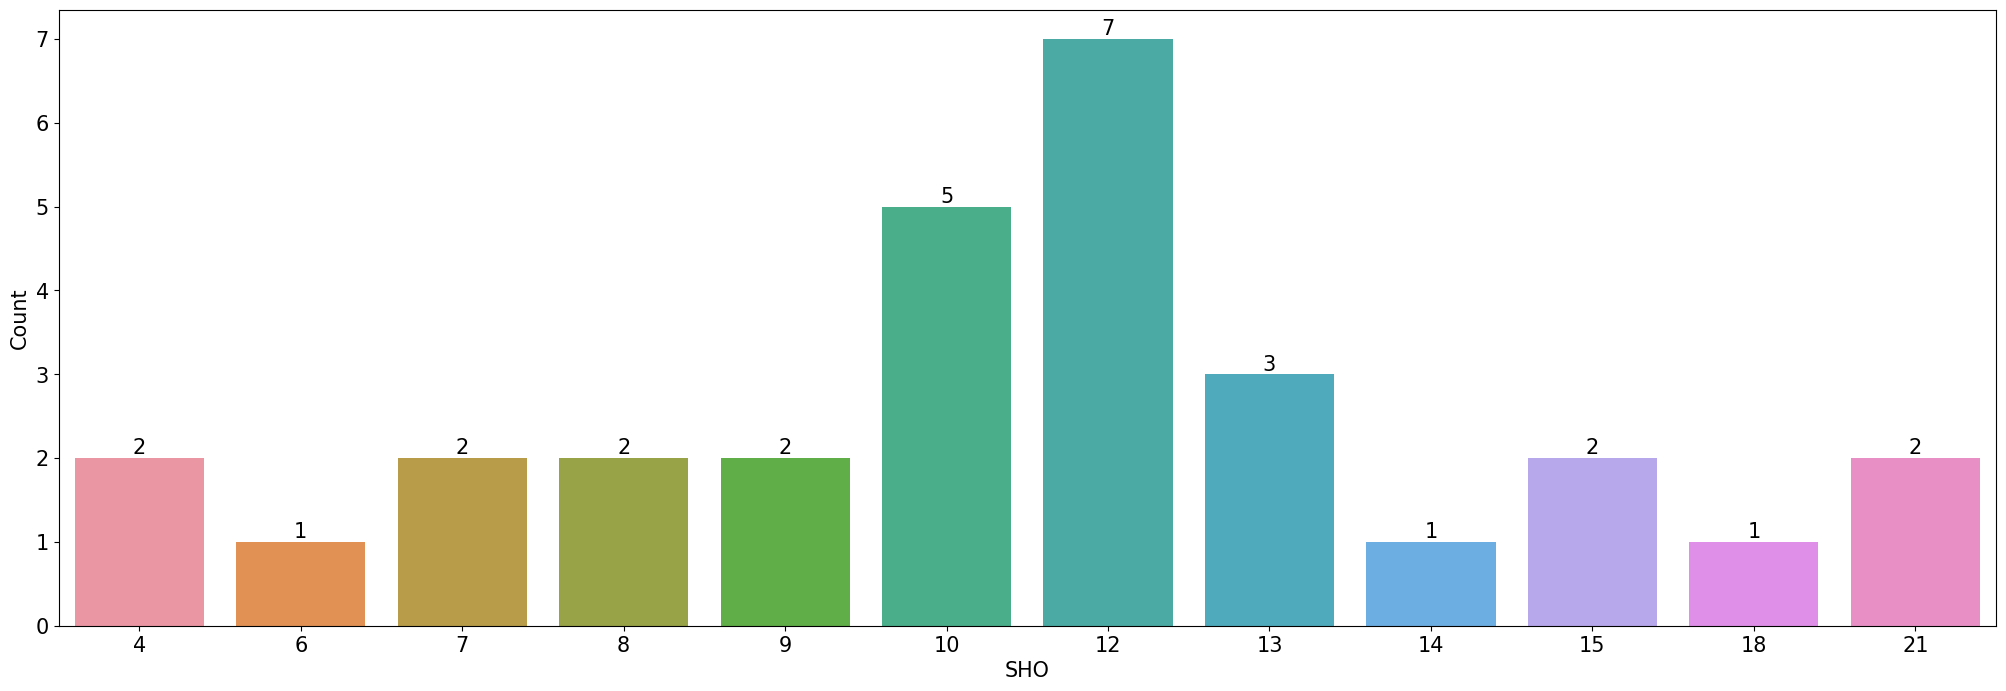

In [94]:
plt.figure(figsize =(25,8))
ax =sns.countplot(x ='SHO', data =df)
ax.bar_label(ax.containers[0], fontsize =15)
plt.xlabel("SHO", fontsize =15)
plt.ylabel('Count', fontsize =15)
plt.yticks(fontsize =15)
plt.xticks(fontsize =15)
plt.show()

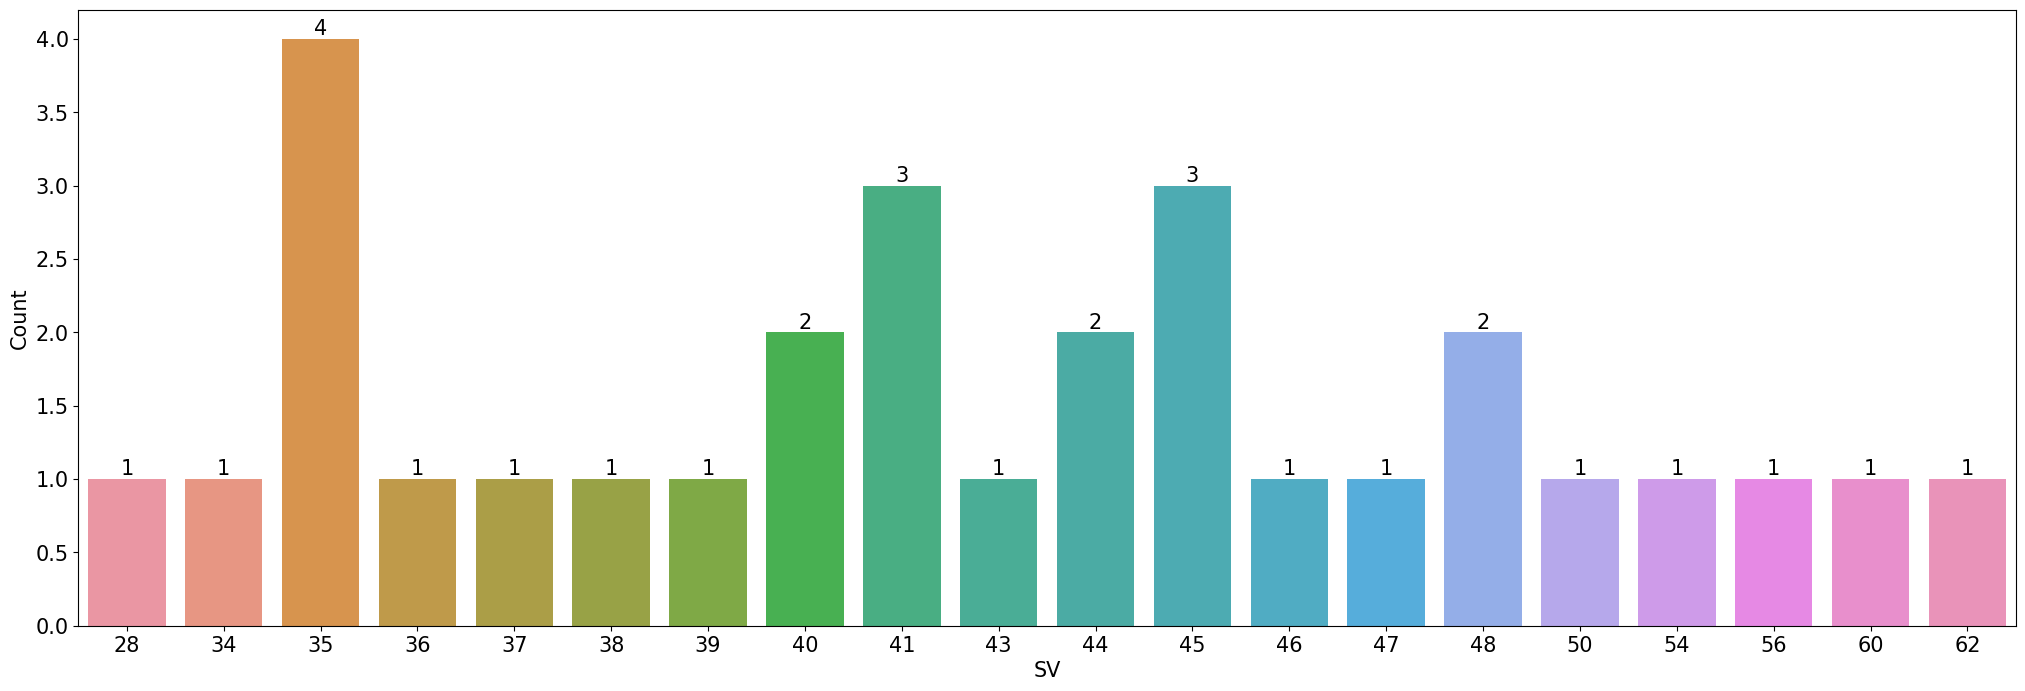

In [95]:
plt.figure(figsize =(25,8))
ax =sns.countplot(x ='SV', data =df)
ax.bar_label(ax.containers[0], fontsize =15)
plt.xlabel("SV", fontsize =15)
plt.ylabel('Count', fontsize =15)
plt.yticks(fontsize =15)
plt.xticks(fontsize =15)
plt.show()

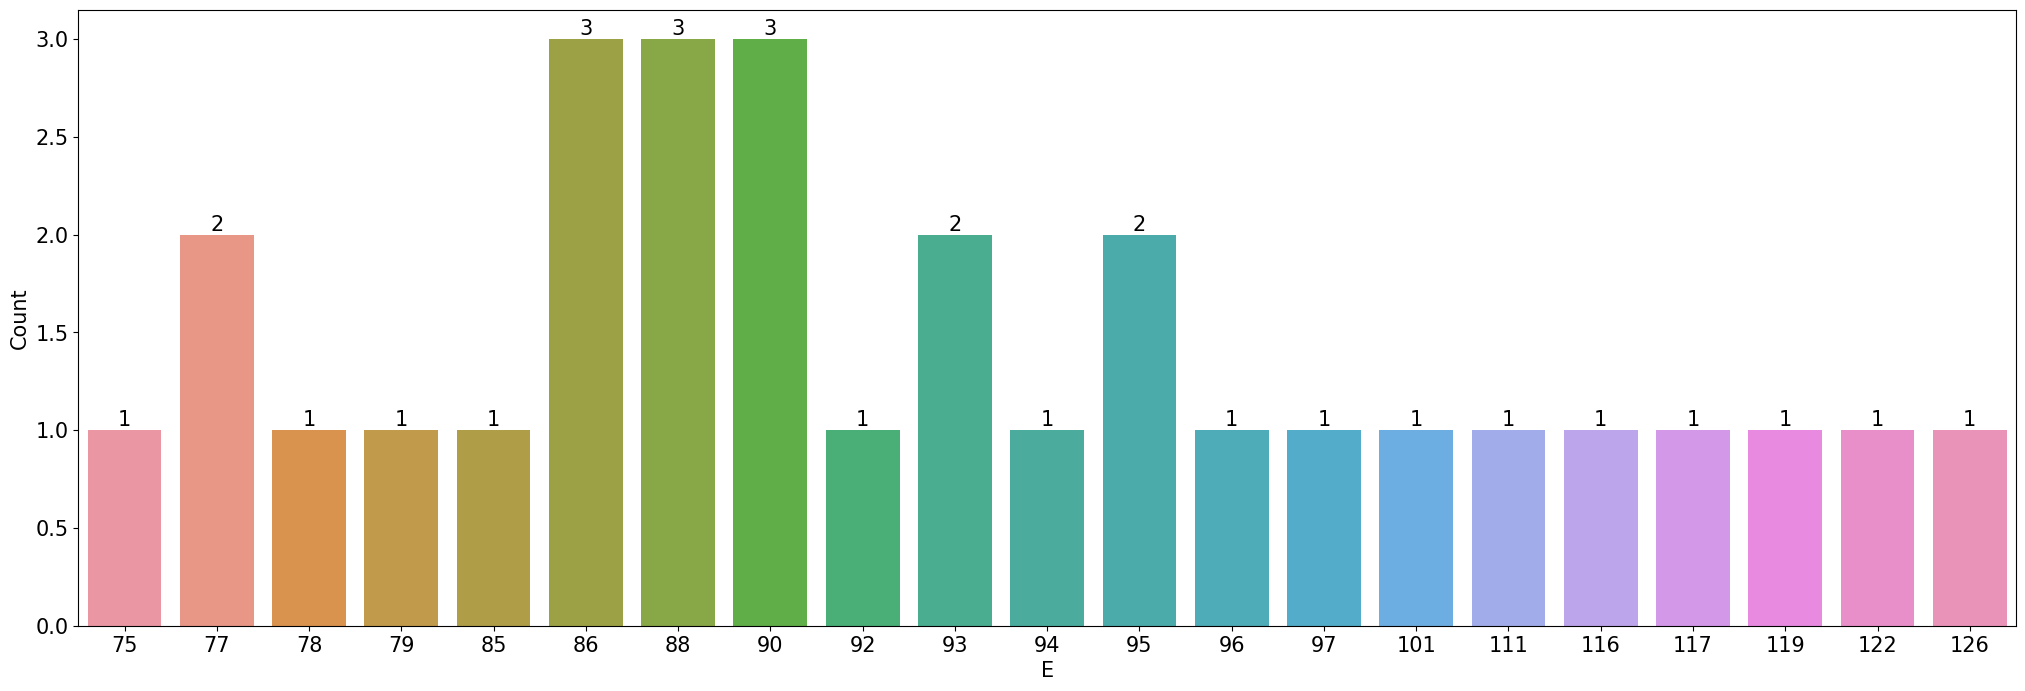

In [96]:
plt.figure(figsize =(25,8))
ax =sns.countplot(x ='E', data =df)
ax.bar_label(ax.containers[0], fontsize =15)
plt.xlabel("E", fontsize =15)
plt.ylabel('Count', fontsize =15)
plt.yticks(fontsize =15)
plt.xticks(fontsize =15)
plt.show()

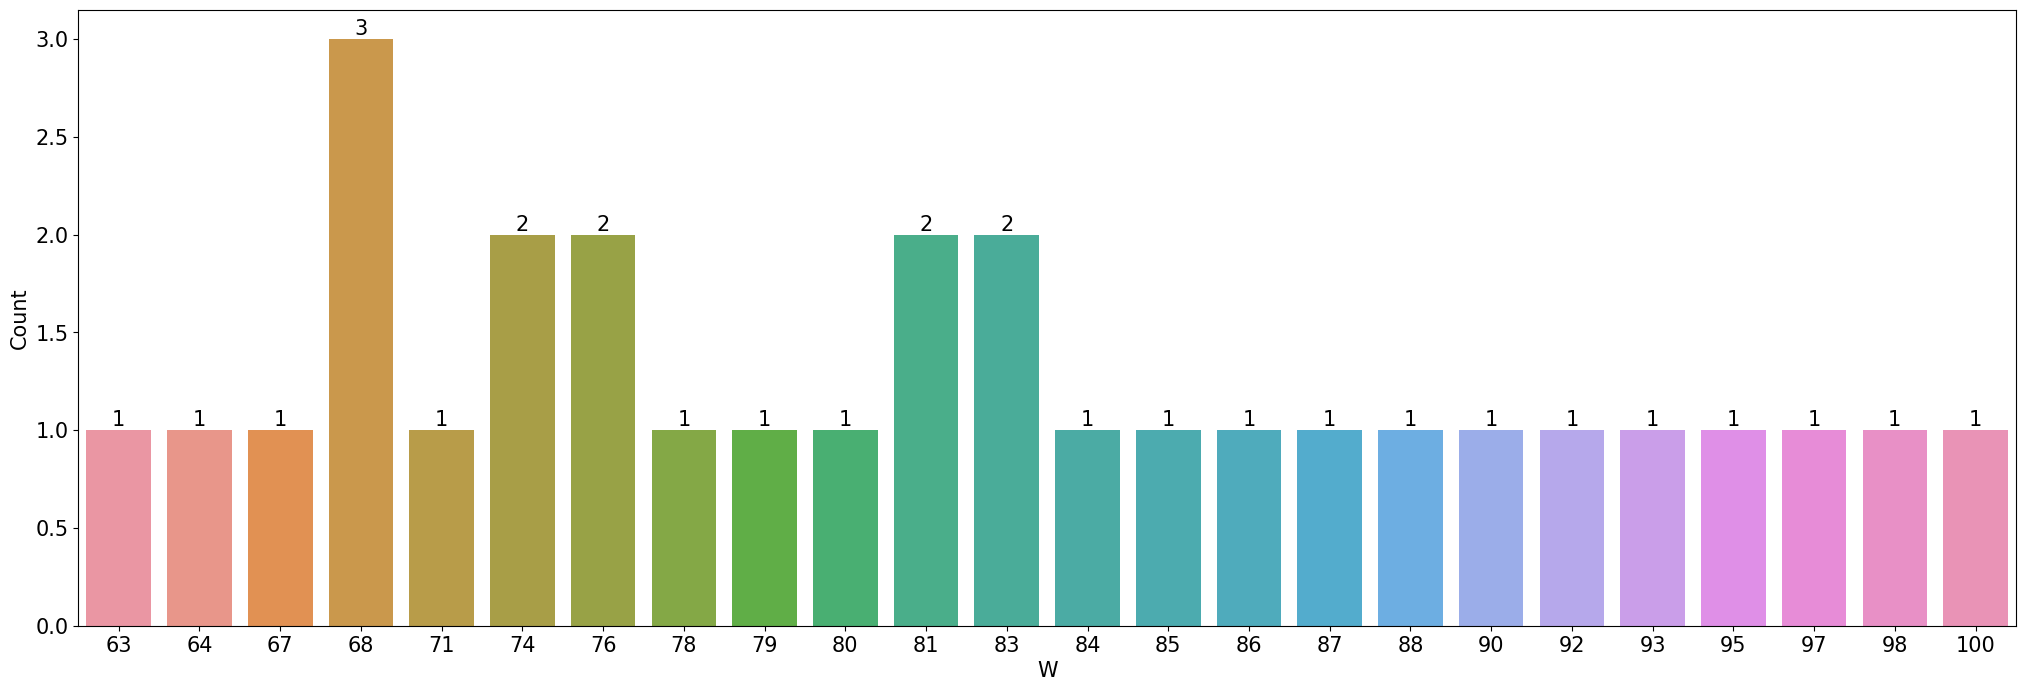

In [97]:
plt.figure(figsize =(25,8))
ax =sns.countplot(x ='W', data =df)
ax.bar_label(ax.containers[0], fontsize =15)
plt.xlabel("W", fontsize =15)
plt.ylabel('Count', fontsize =15)
plt.yticks(fontsize =15)
plt.xticks(fontsize =15)
plt.show()

### Plotting LMPlot

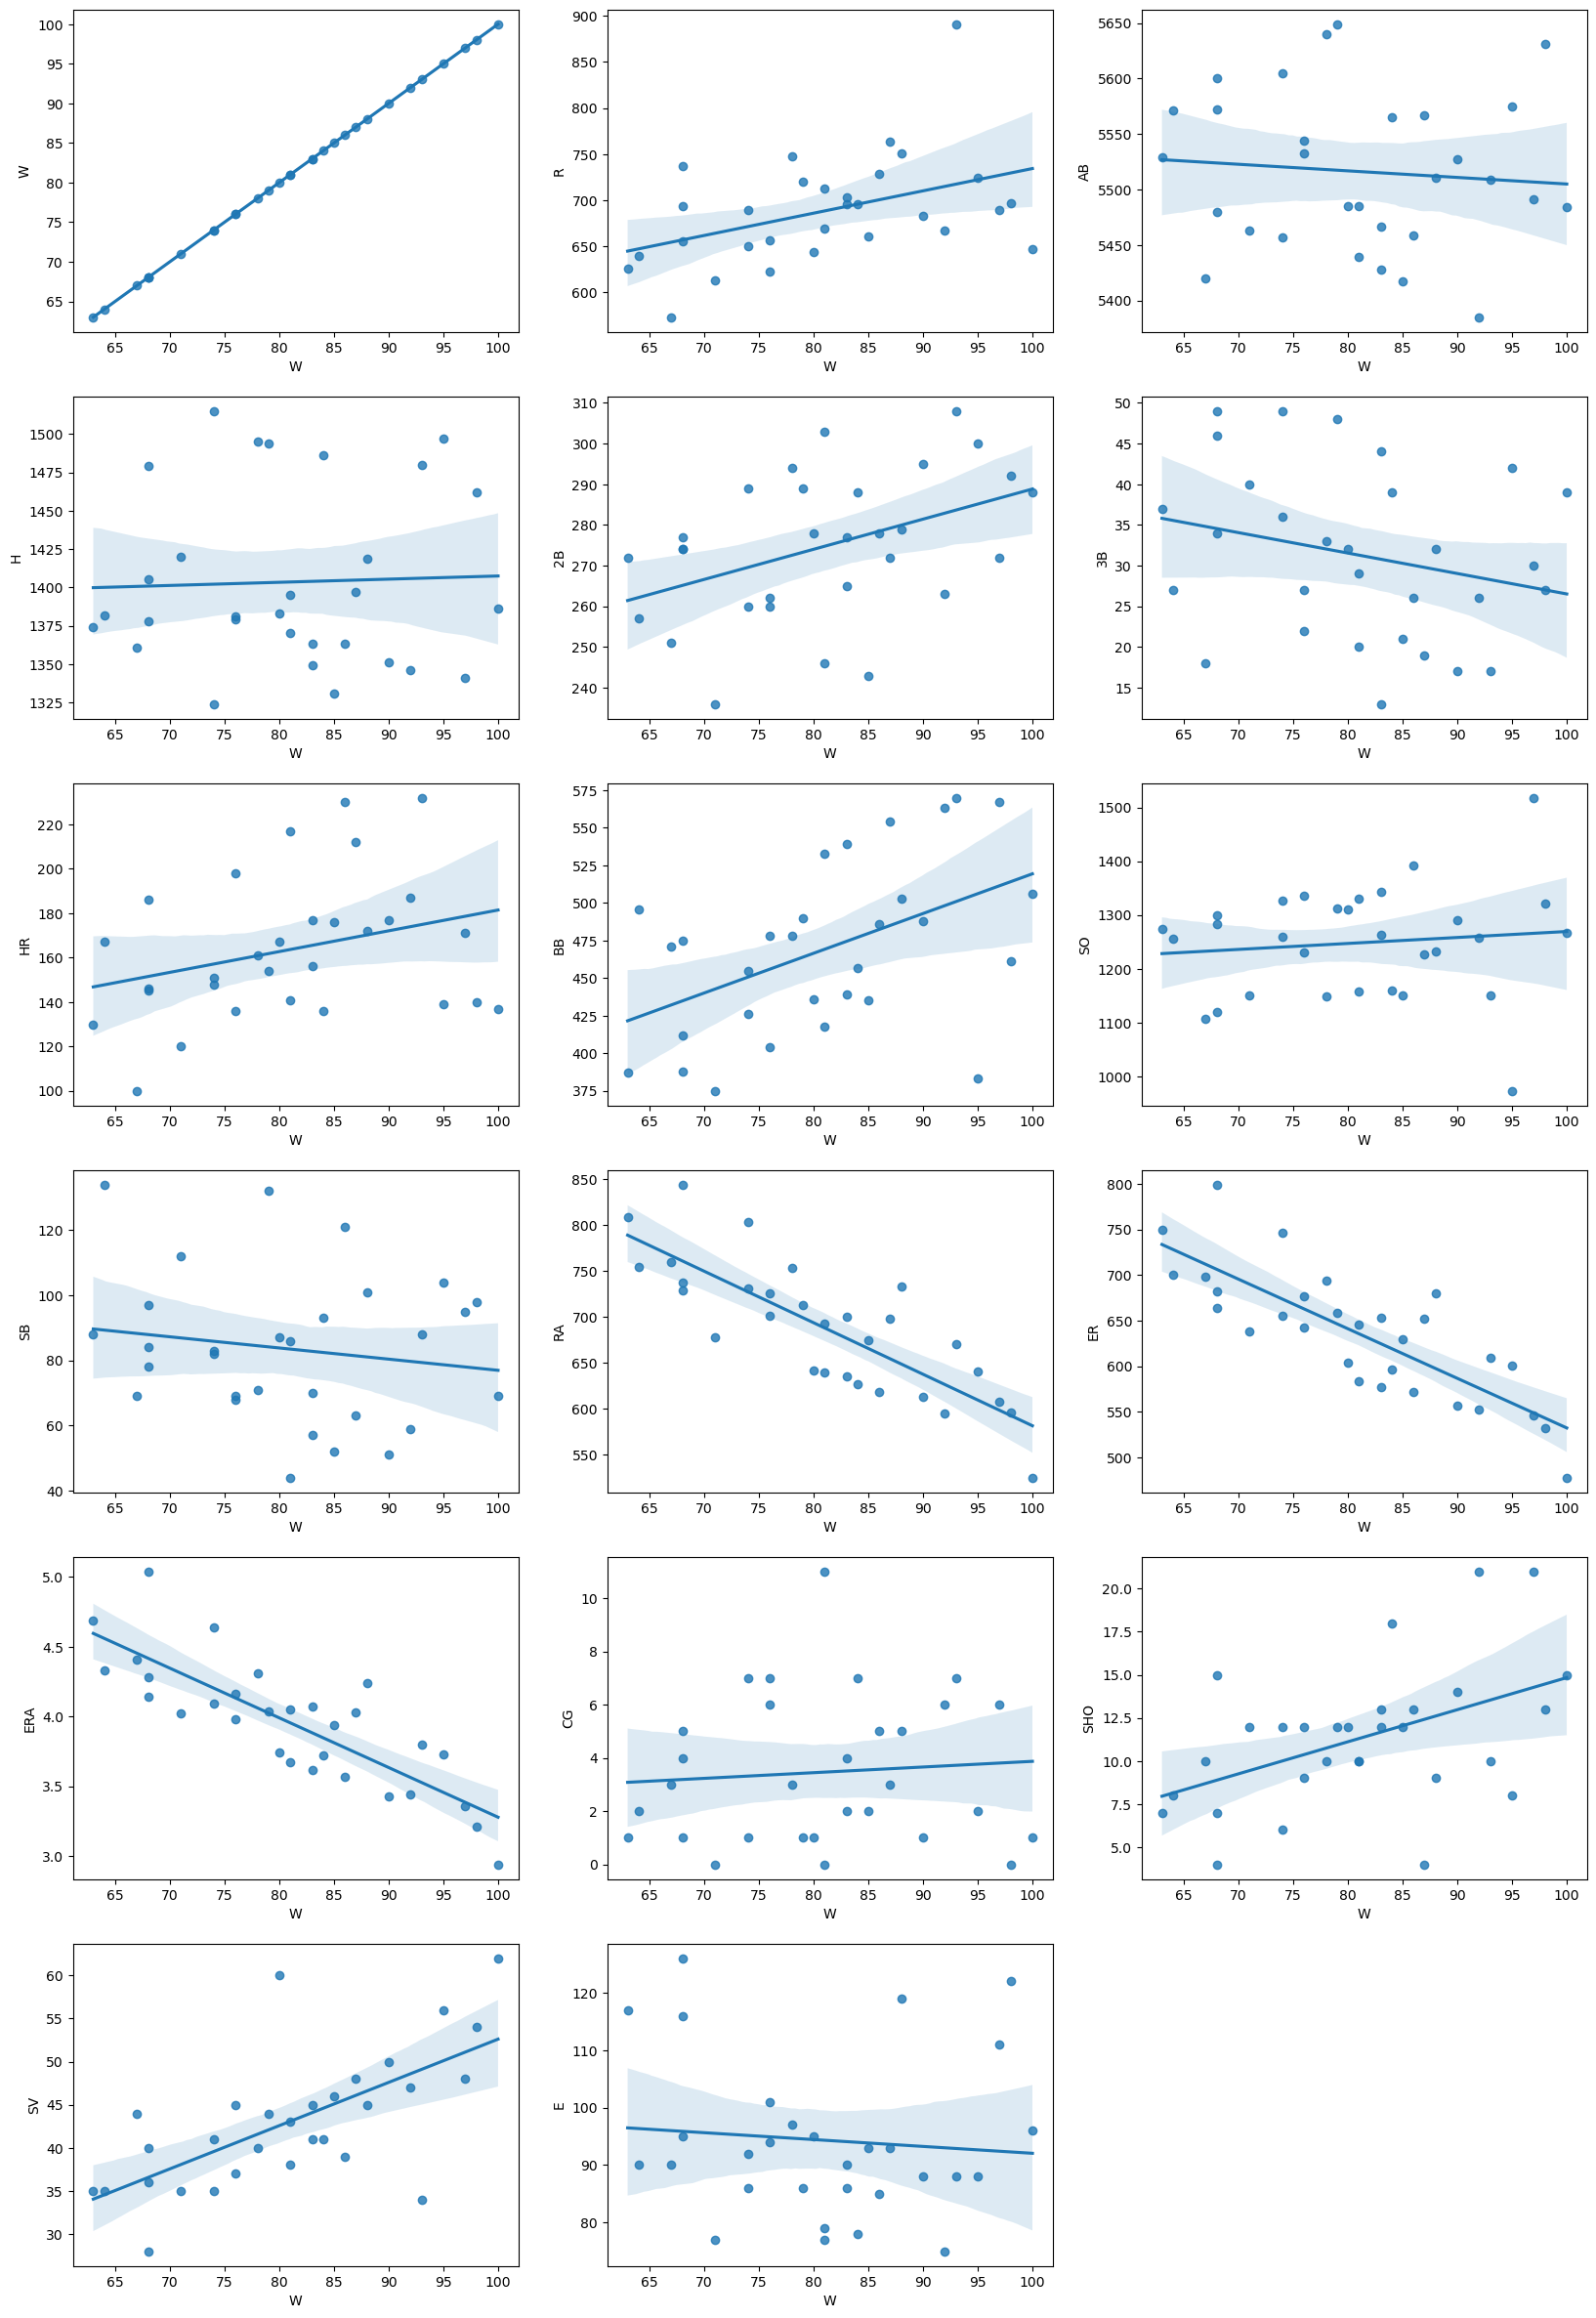

In [98]:
plt.figure(figsize =(20,30))
plotnumber =1

for i in df:
    if plotnumber <= 17:
        plt.subplot(6, 3, plotnumber)
        ax =sns.regplot(x ='W', y =i, data =df)
        plt.xlabel('W')
        plt.ylabel(i)
    plotnumber+=1
plt.show()

__Plotting pair Plot__

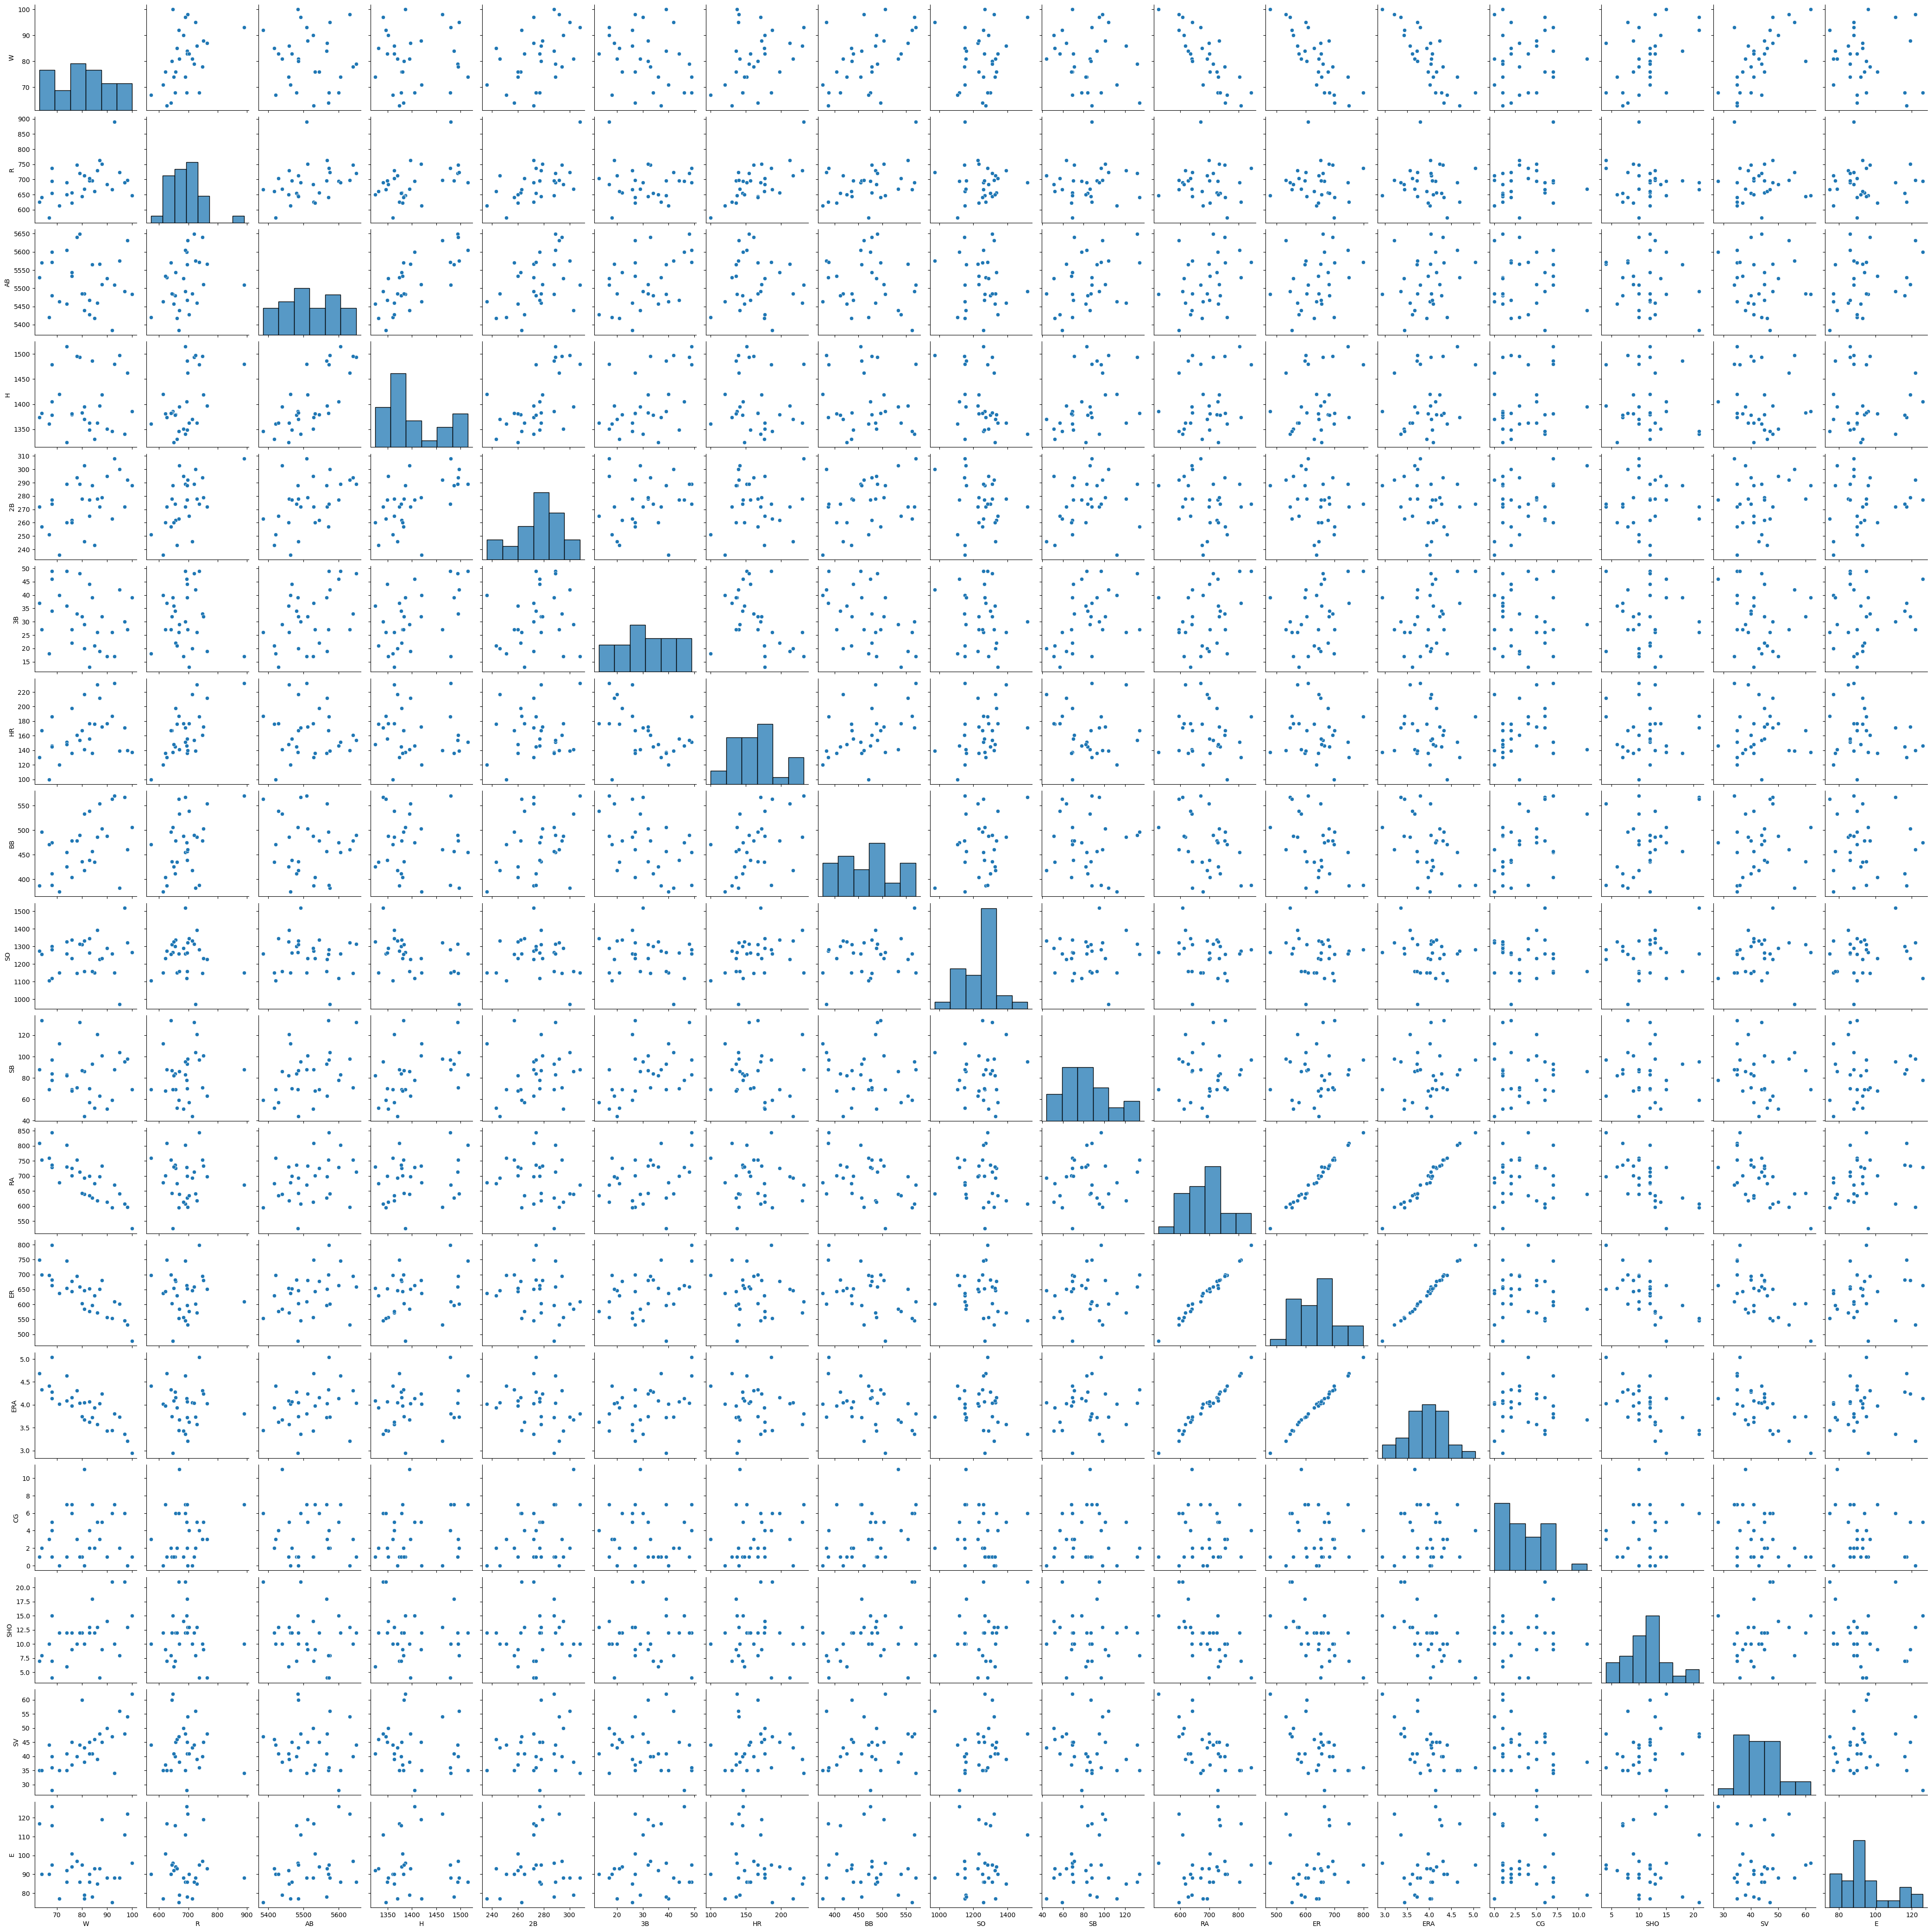

In [99]:
sns.pairplot(df, palette ='Dark2')
plt.show()

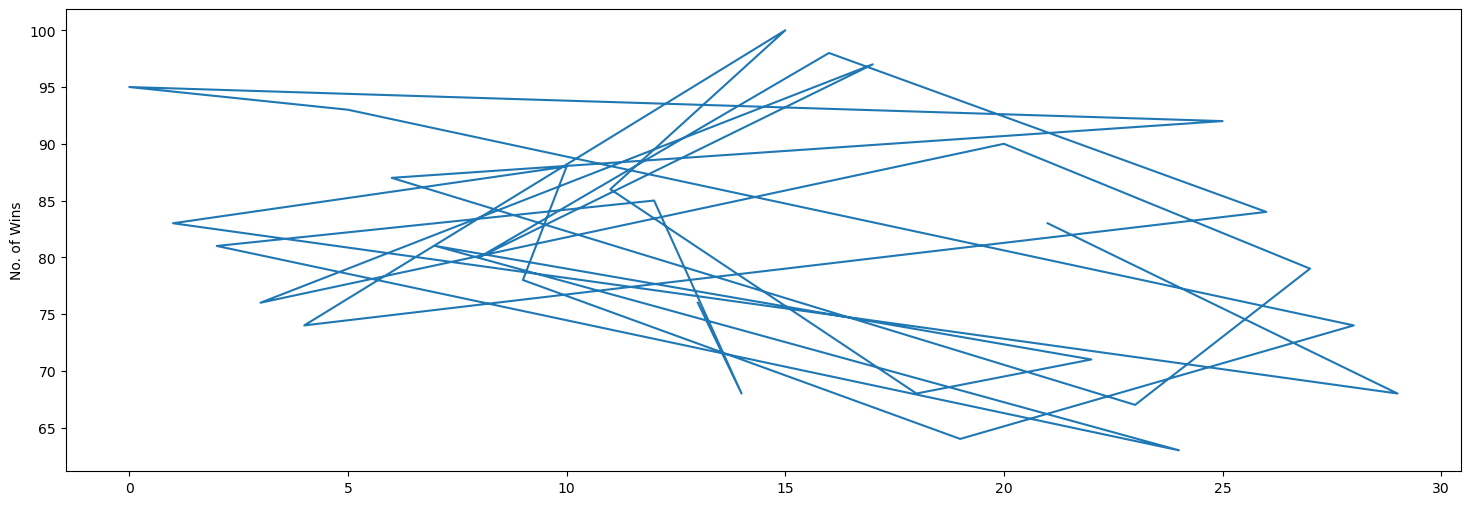

In [100]:
plt.figure(figsize =(18, 6))
plt.plot(df.W, label ="No of Wins")
plt.ylabel('No. of Wins')
plt.show()

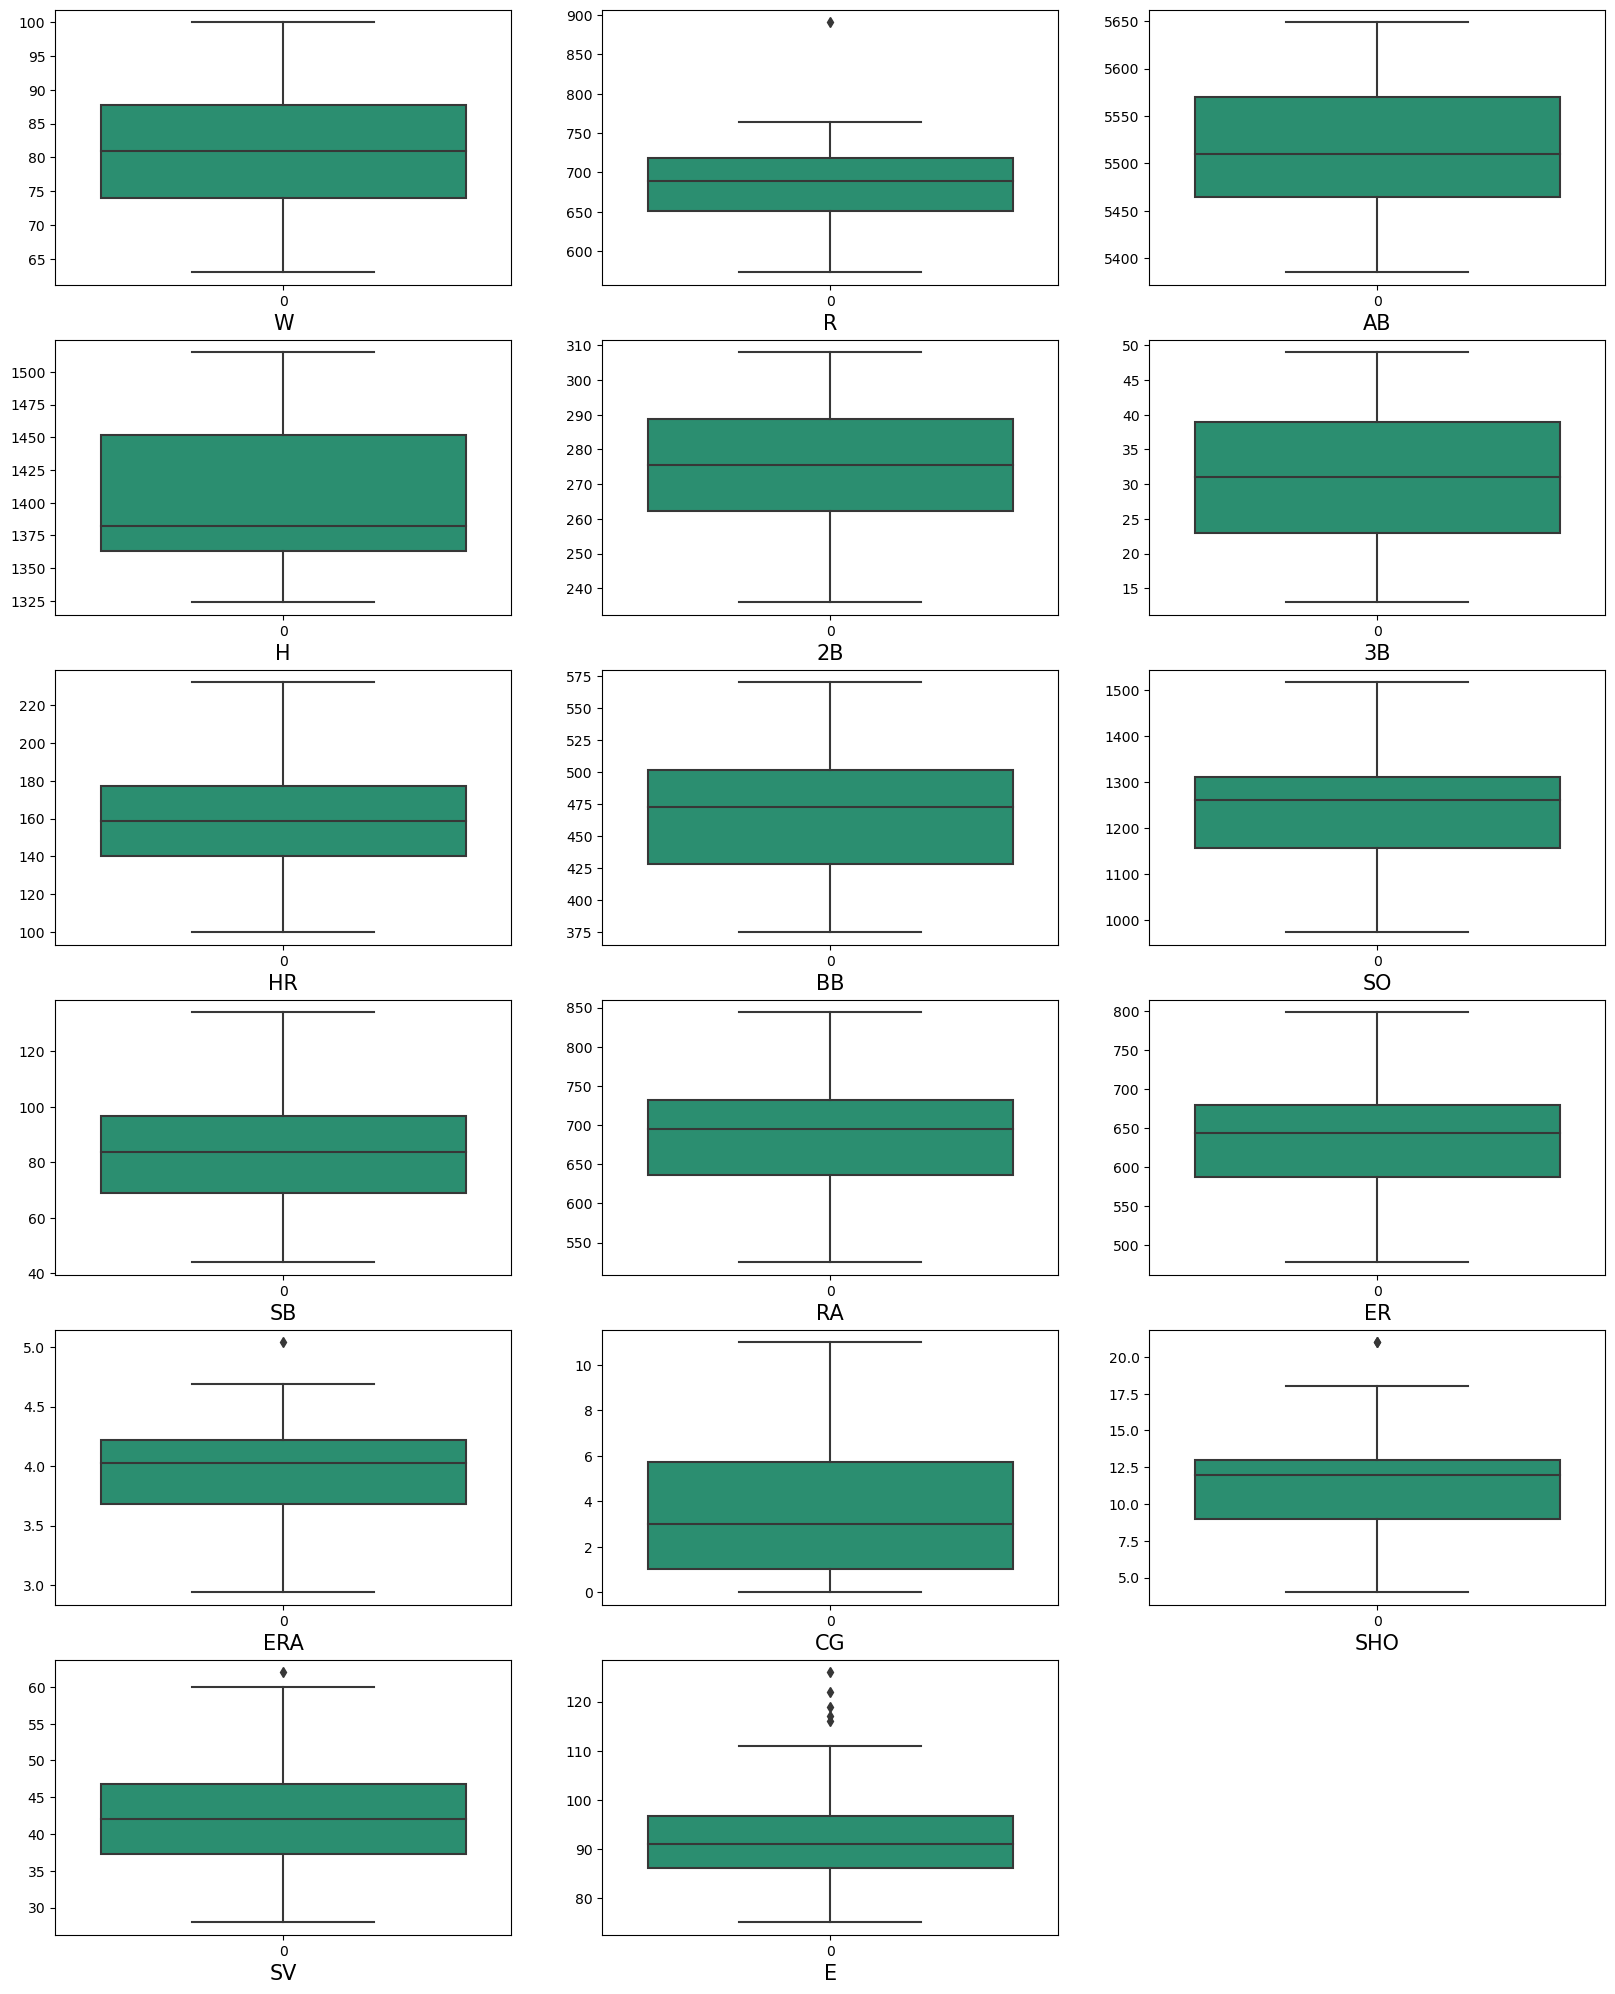

In [101]:
# Checking outliers using boxplot
plt.figure(figsize =(20, 25))
plotnumber =1

for i in df:
    if plotnumber <= 17:
        plt.subplot(6, 3, plotnumber)
        sns.boxplot(df[i], palette ='Dark2')
        plt.xlabel(i, fontsize =15)
        
    plotnumber+=1
plt.show()

__Outliers found in 'R', 'ERA', 'SHO', 'SV' and 'E' column.__

In [102]:
# Removing outliers using IQR method
df_iqr =df[['R', 'ERA', 'SHO', 'SV', 'E']]

Q1 =df_iqr.quantile(0.25)
Q3 =df_iqr.quantile(0.75)

IQR =Q3-Q1

# For higher side
for i in df_iqr:
    high_iqr =Q3[i] + (IQR[i] * 1.5)
    high_index =np.where(df_iqr[i] > high_iqr)
    df_iqr =df_iqr.drop(df_iqr.index[high_index])
    
# For Lower Side
for i in df_iqr:
    low_iqr =Q1[i] - (1.5 * IQR[i])
    low_index =np.where(df_iqr[i] < low_iqr)
    df_iqr =df_iqr.drop(df_iqr.index[low_index])


In [103]:
# Removing outliers using zscore
df_zscore =df[['R', 'ERA', 'SHO', 'SV', 'E']]

z =np.abs(zscore(df_zscore))
df_zscore =df_zscore[(z < 3).all(axis =1)]

In [104]:
# Checing data loss after using IQR and zscore
print("Shape of original dataset :", df.shape[0])
print('\n')
print("Shape of dataset after removing outliers by using IQR method :",df_iqr.shape[0])
print("Data Loss :",((df.shape[0] - df_iqr.shape[0])/df.shape[0])*100)
print('\n')
print("Shape of dataset after removing outliers by using Zscore method :",df_zscore.shape[0])
print("Data Loss :",((df.shape[0] - df_zscore.shape[0])/df.shape[0])*100)

Shape of original dataset : 30


Shape of dataset after removing outliers by using IQR method : 20
Data Loss : 33.33333333333333


Shape of dataset after removing outliers by using Zscore method : 29
Data Loss : 3.3333333333333335


__We will use zscore to remove outliers as data loss is minimum in zscore__

In [105]:
z =np.abs(zscore(df))
df =df[(z < 3).all(axis=1)]
df.shape

(29, 17)

### Check data distribution in columns

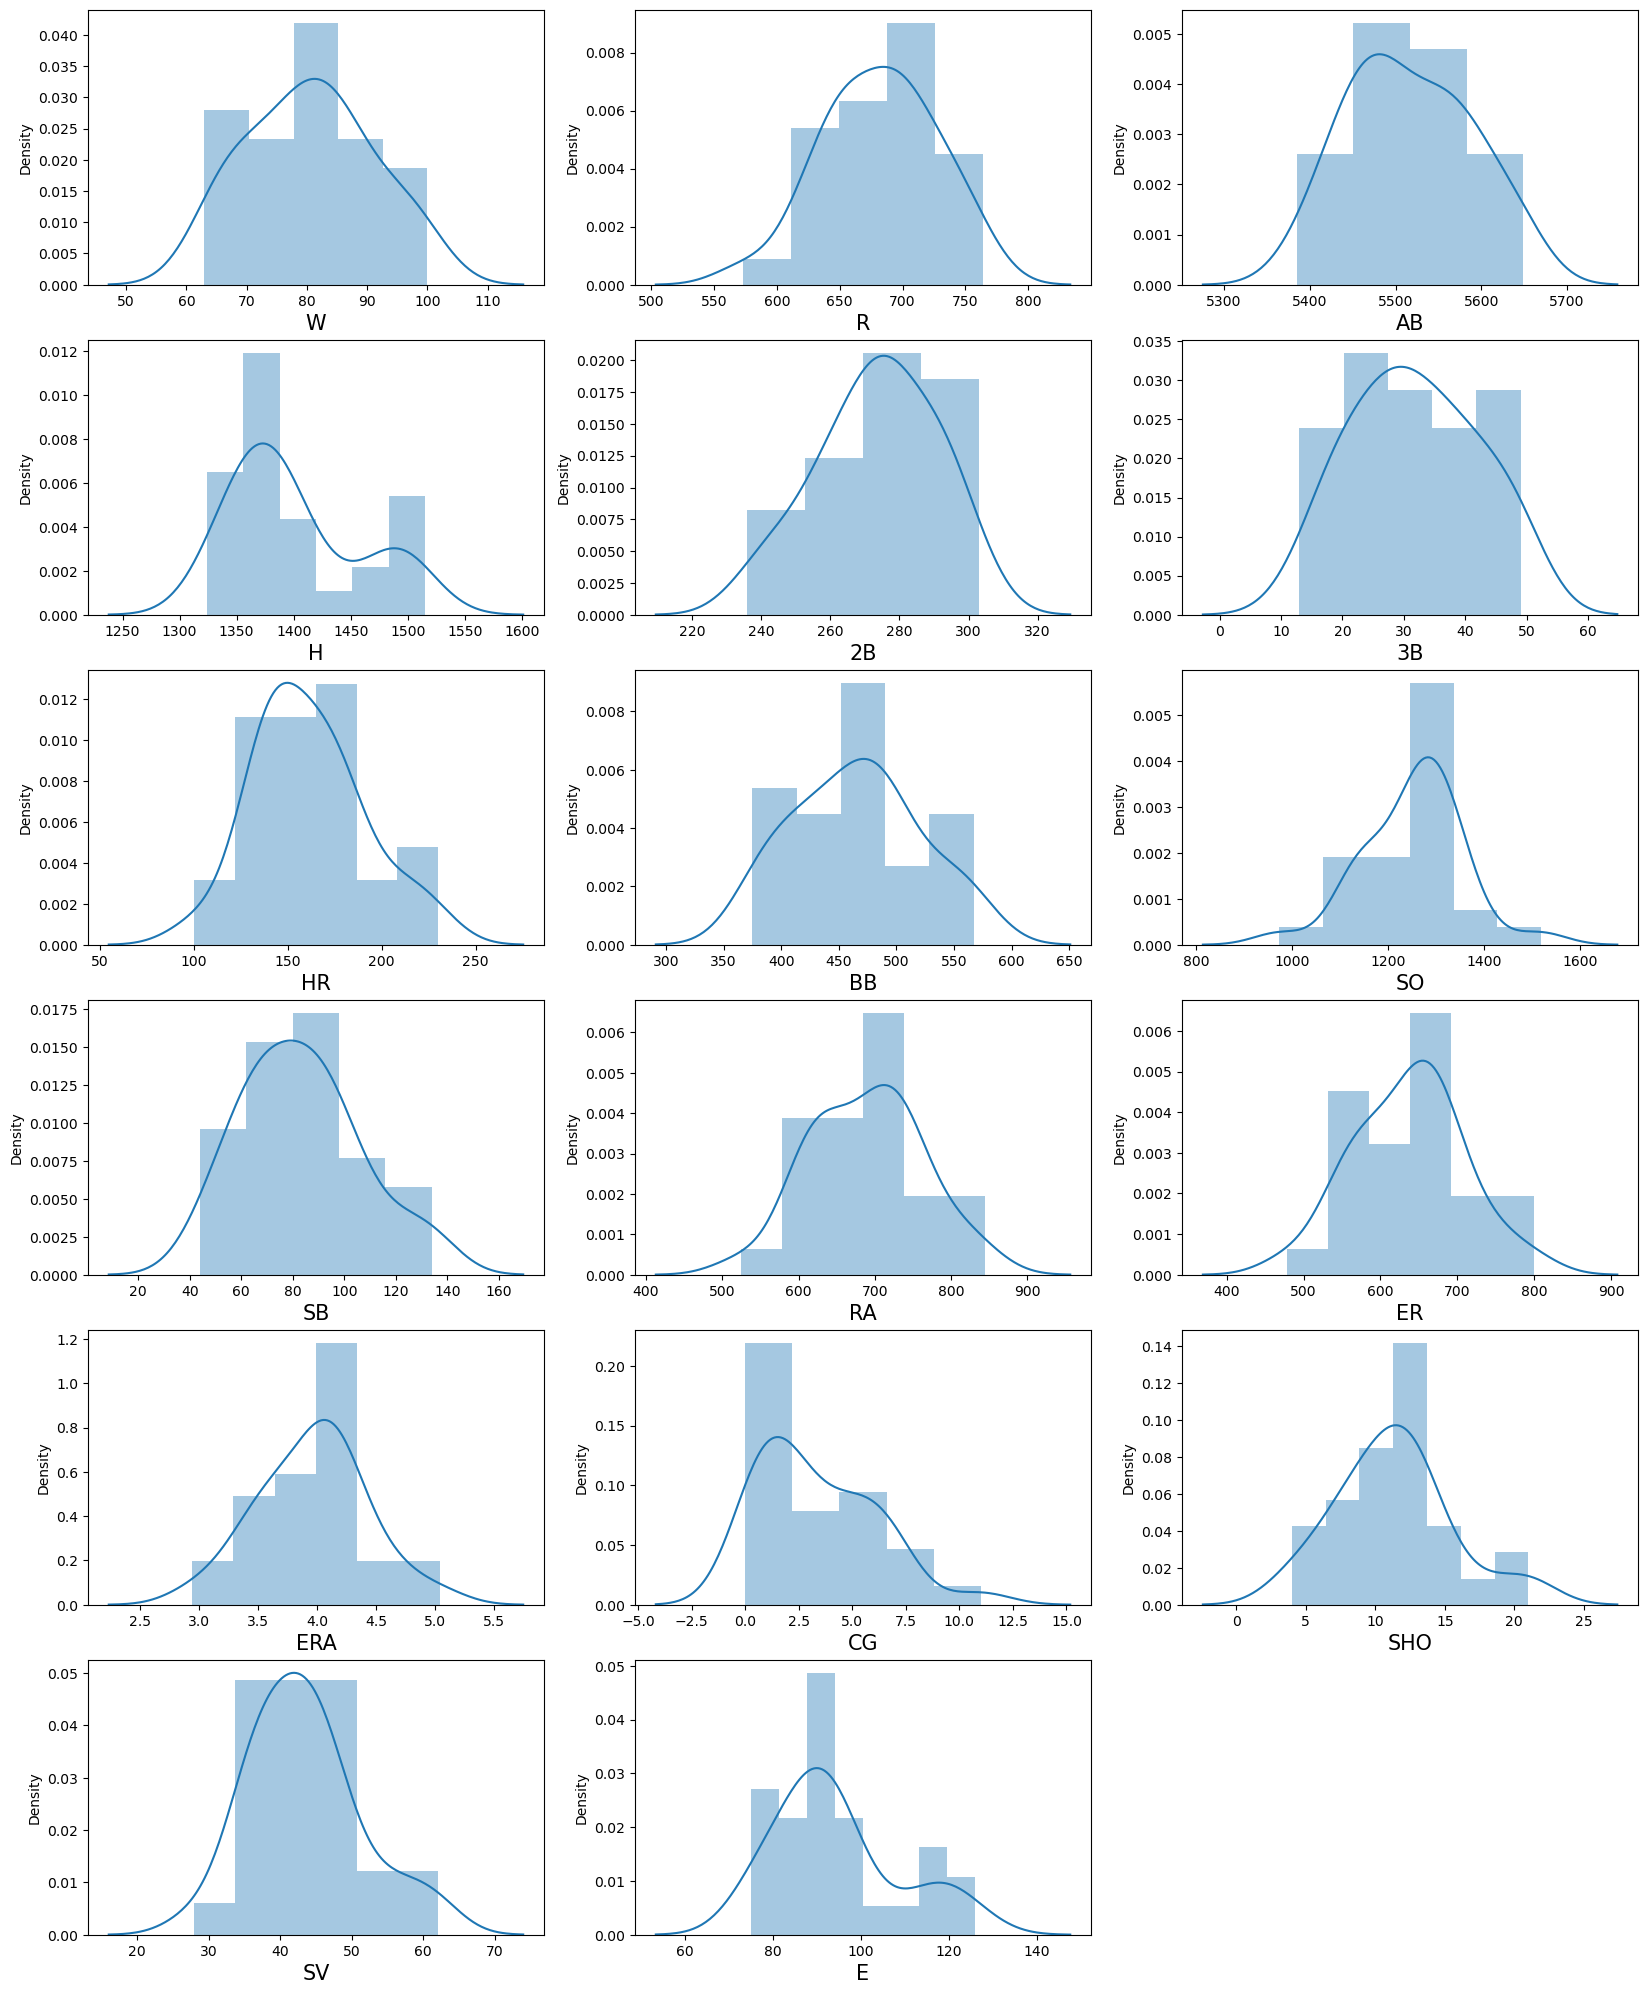

In [106]:
plt.figure(figsize =(20,25))
plotnumber =1

for i in df:
    if plotnumber <=17:
        plt.subplot(6, 3, plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize =15)
    plotnumber+=1
plt.show()

__From above graph, we can say that data distribution is normal in all the columns except 'CG'__

In [107]:
# Checking skewness
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [108]:
# Removing skewnees using cuberoot method
df['H'] =np.cbrt(df['H'])
df['CG'] =np.cbrt(df['CG'])
df['SHO'] =np.cbrt(df['SHO'])
df['SV'] =np.cbrt(df['SV'])
df['E'] =np.cbrt(df['E'])

In [109]:
# Againg checking skewness
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.753696
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -1.013981
SHO   -0.298136
SV     0.280963
E      0.671748
dtype: float64

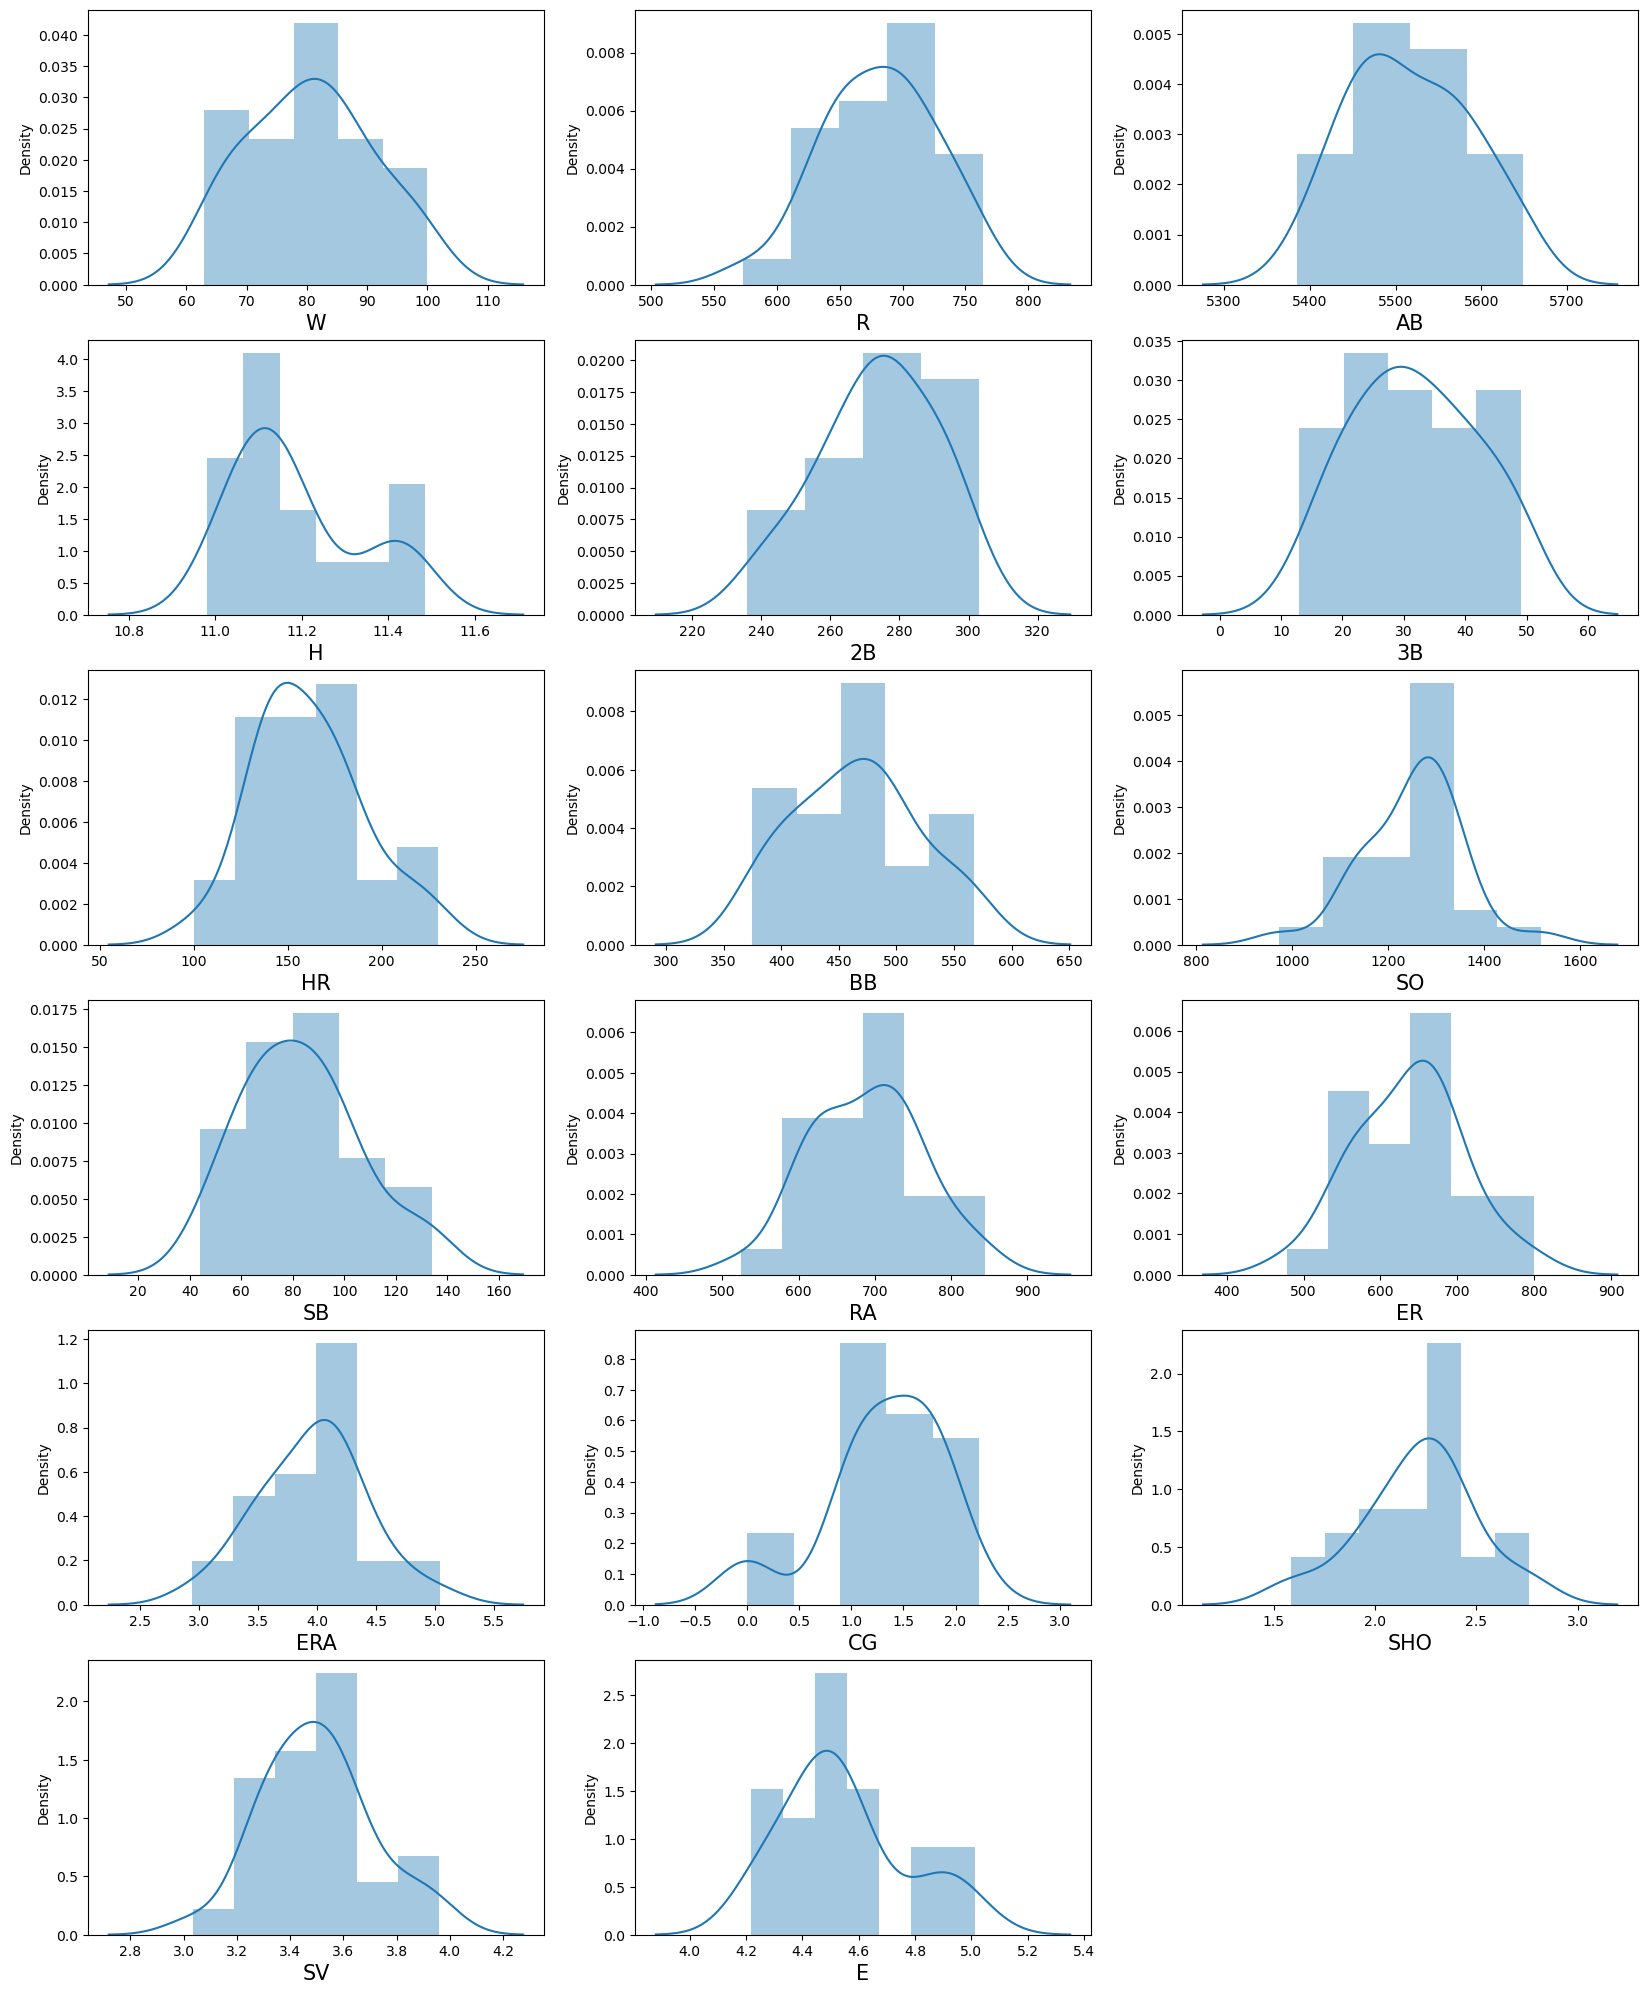

In [110]:
# Again visualizing data distribution in columns after removing skewness
plt.figure(figsize =(20,25))
plotnumber =1

for i in df:
    if plotnumber <=17:
        plt.subplot(6, 3, plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize =15)
    plotnumber+=1
plt.show()

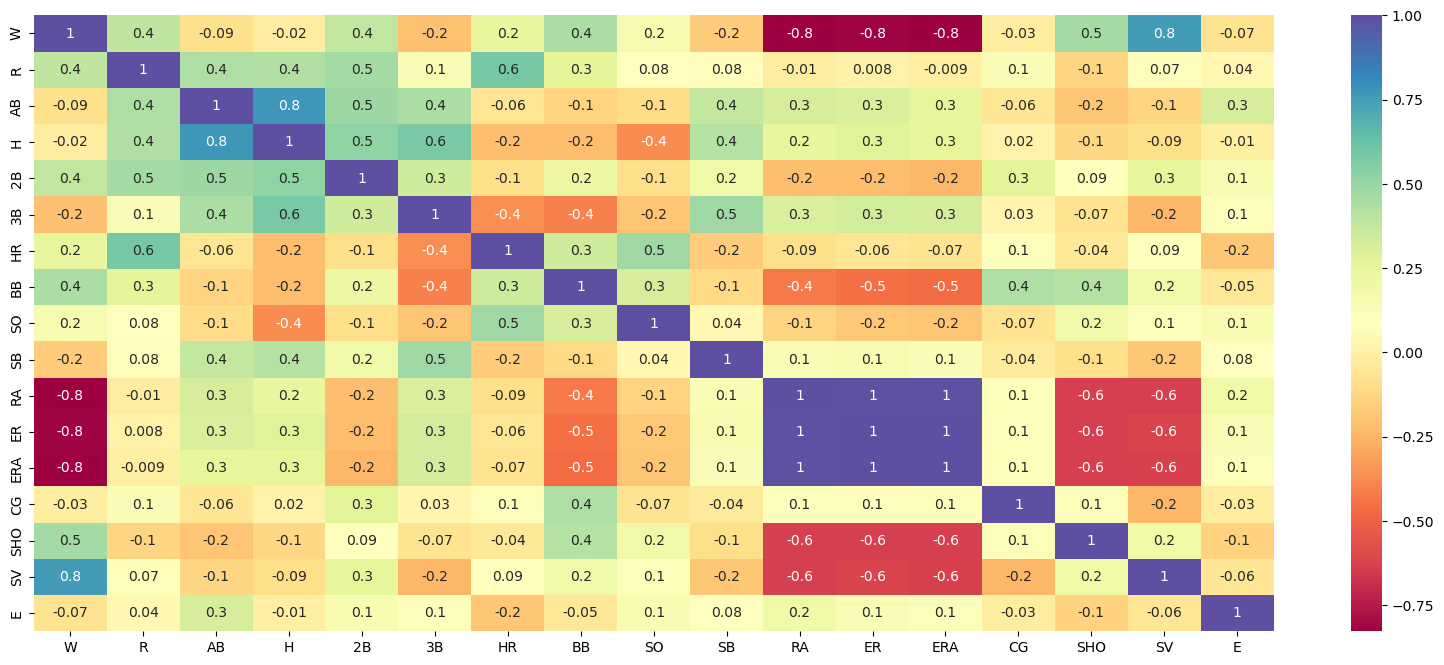

In [111]:
# Plotting heatmap
plt.figure(figsize =(20, 8))
sns.heatmap(df.corr(), annot =True, fmt ='.1g', linecolor ='black', cmap ='Spectral')
plt.show()

__As per above heatmap we found multicollinearity between RA, ER, ERA.__

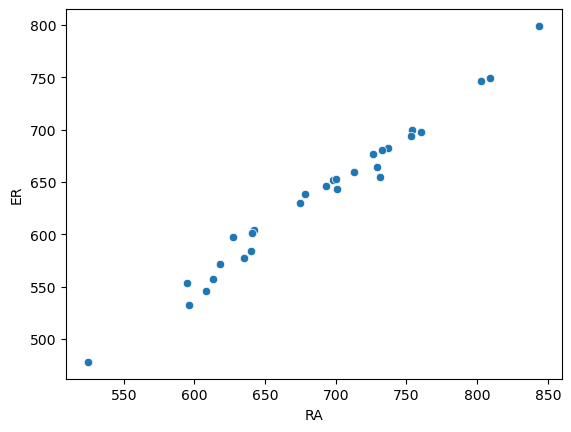

In [112]:
# Plotting scatter plot to again check multicollinearity
sns.scatterplot(x ='RA', y ='ER', data =df)
plt.show()

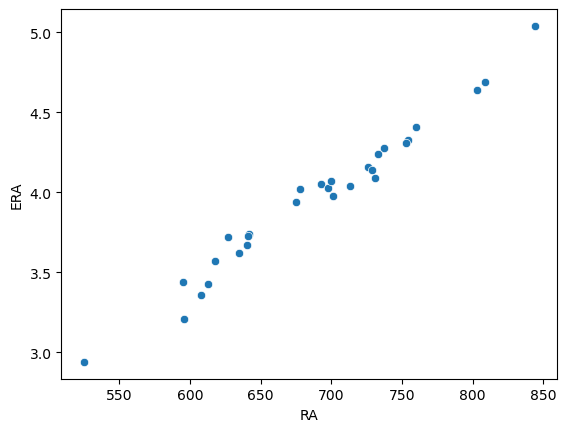

In [113]:
sns.scatterplot(x ='RA', y ='ERA', data =df)
plt.show()

__We can confirm multicollinearity by checking the scatter plot. We will delete 2 columns and keep one.ER, RA and ERA have same correlation with the label. So we can delete any 2 columns__

In [114]:
# Droping 'RA' and 'ERA' columns
df.drop(columns =['RA', 'ERA'], inplace =True)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 13 to 21
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       29 non-null     int64  
 1   R       29 non-null     int64  
 2   AB      29 non-null     int64  
 3   H       29 non-null     float64
 4   2B      29 non-null     int64  
 5   3B      29 non-null     int64  
 6   HR      29 non-null     int64  
 7   BB      29 non-null     int64  
 8   SO      29 non-null     int64  
 9   SB      29 non-null     int64  
 10  ER      29 non-null     int64  
 11  CG      29 non-null     float64
 12  SHO     29 non-null     float64
 13  SV      29 non-null     float64
 14  E       29 non-null     float64
dtypes: float64(5), int64(10)
memory usage: 3.6 KB


<function matplotlib.pyplot.show(close=None, block=None)>

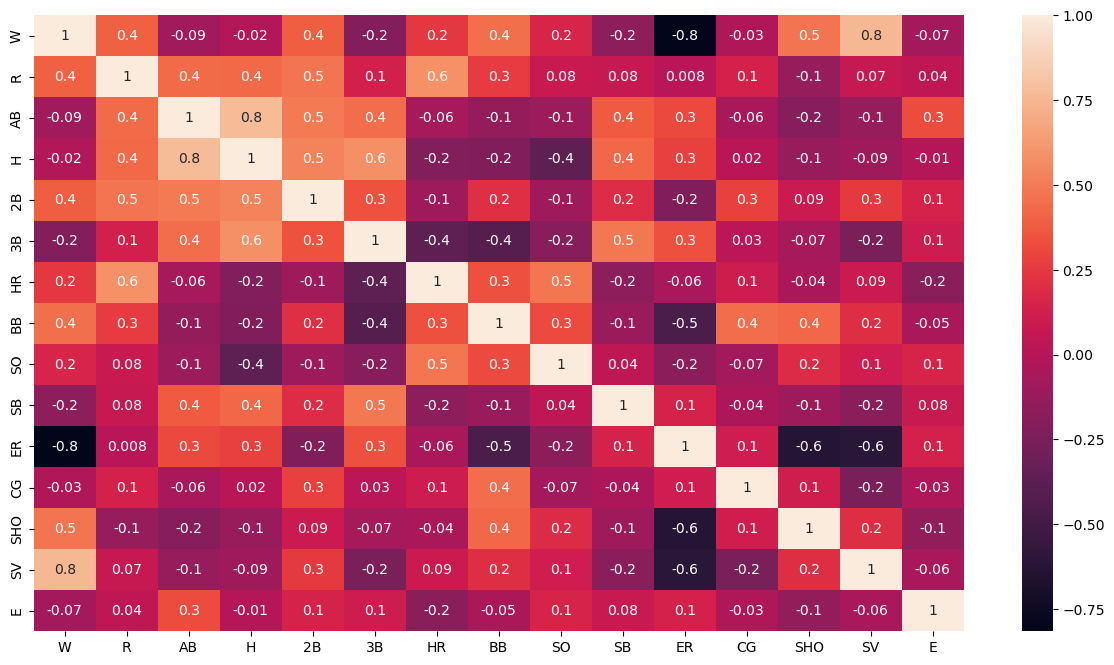

In [116]:
# Again plot heatmap
plt.figure(figsize =(15,8))
sns.heatmap(df.corr(), annot =True, fmt ='.1g')
plt.show

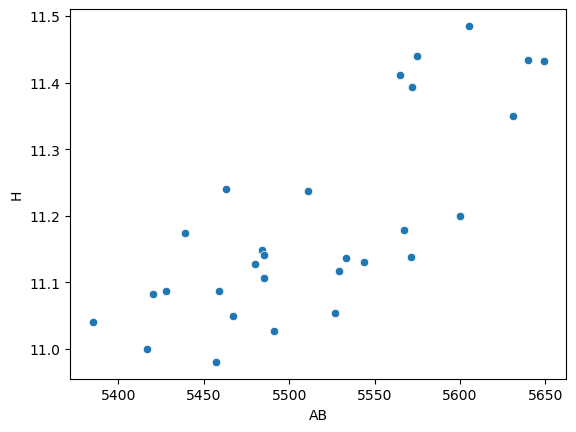

In [117]:
# Lets check multicollinearity between 'AB' and 'H' columns
sns.scatterplot(x ='AB', y ='H', data =df)
plt.show()

__'H' and 'AB' are not high correlated with each other. So we will not delete it.__

In [118]:
# Seperating Features and label
x =df.drop(columns =['W'])
y =df[['W']]

In [119]:
# Appling StandarScaler into dataset
scaler =StandardScaler()
x =pd.DataFrame(scaler.fit_transform(x), columns =x.columns)
x

,R,AB,H,2B,3B,HR,BB,SO,SB,ER,CG,SHO,SV,E
0,-0.566355,0.390081,-0.388713,-0.682763,-0.969865,1.262607,0.230197,0.826931,-0.629176,0.575226,0.893823,0.274630,0.270050,0.007236
1,0.286272,1.184926,0.087905,0.201171,1.406988,-0.525197,0.174411,-1.297968,-0.234429,0.389399,0.703744,0.904141,-2.277280,2.155971
2,-0.454167,-1.412514,-1.284608,-1.802414,-1.068901,0.506228,-0.569402,-0.994411,-1.374810,-0.096610,-0.094672,0.274630,0.398099,-0.067301
3,-0.274666,-1.100253,-0.094708,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.754153,1.615608,-0.206072,-0.684238,-1.171994
4,-1.239481,0.177176,-0.481056,-0.093474,0.515668,-1.075291,-1.461978,0.219817,0.204180,1.604423,-0.555782,-1.066046,-1.129315,1.592488
5,0.712585,-0.447345,-0.555092,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.132100,-2.329822,-0.206072,0.008146,-1.340220
6,-1.531169,-0.759605,0.360207,-2.214917,0.812774,-1.419099,-1.685122,-0.994411,1.256840,0.017745,-2.329822,0.274630,-1.129315,-1.340220
7,-0.588792,-0.518313,-0.407164,0.024384,0.218561,-0.559578,-0.997094,0.464621,0.028736,0.646698,-0.555782,-1.066046,-0.400394,1.528116
8,1.071586,-0.816380,-0.685001,0.260100,-0.573723,2.362794,0.378960,1.375292,1.651587,-0.925686,0.703744,0.495072,-0.541103,-0.683760
9,-0.768292,-0.461539,-0.259808,0.849390,0.713739,-0.834625,0.750867,0.151272,-0.629176,-2.269360,-0.555782,0.904141,2.233277,0.154740


In [120]:
# Checking variance inflation factor
vif =pd.DataFrame()
vif['VIF Values'] =[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Feature'] =x.columns
vif

,VIF Values,Feature
0,6.309808,R
1,4.558919,AB
2,7.110193,H
3,3.522032,2B
4,3.000779,3B
5,6.301273,HR
6,3.104536,BB
7,2.278316,SO
8,1.716557,SB
9,5.025113,ER


__All the vif values are less than 10, so we will not delete any column.__

## EDA Completed

### Model Building

__Find best random state__

In [121]:
maxrs =0
maxacc =0

for i in range(1, 200):
    x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.3, random_state =i)
    LR =LinearRegression()
    LR.fit(x_train, y_train)
    pred =LR.predict(x_test)
    acc =r2_score(y_test, pred)
    
    if acc > maxacc:
        maxacc =acc
        maxrs =i
        
print("Maximum accuracy is :", maxacc*100, "at random state :", maxrs)

Maximum accuracy is : 94.39233657177337 at random state : 9


In [122]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.3, random_state =maxrs)

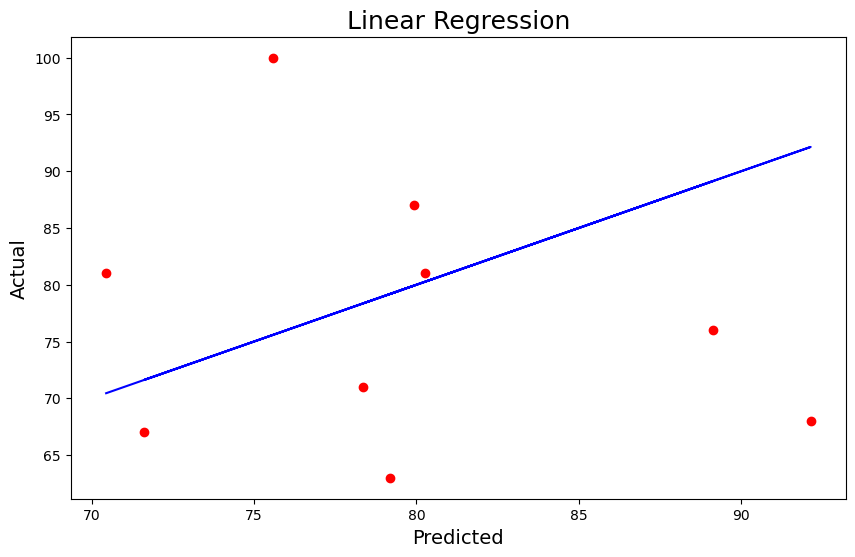

In [123]:
# Visualizing model accuracy
plt.figure(figsize =(10,6))
plt.scatter(x =pred, y =y_test, color ='r')
plt.plot(pred, pred, color ='b')
plt.xlabel('Predicted', fontsize =14)
plt.ylabel('Actual', fontsize =14)
plt.title("Linear Regression", fontsize =18)
plt.show()

In [124]:
# Initializing models
RFR =RandomForestRegressor()
ETR =ExtraTreesRegressor()
LR =LinearRegression()
svr =SVR()
GBR =GradientBoostingRegressor()
ADR =AdaBoostRegressor()
BR =BaggingRegressor()
DTR =DecisionTreeRegressor()
lasso =Lasso()
ridge =Ridge()

In [125]:
# Defining models
models ={'RandomForestRegressor': RFR,
        'ExtraTreesRegressor': ETR,
        'LinearRegression': LR,
        'SVR': svr,
        'GradientBoostingRegressor': GBR,
        'AdaBoostRegressor': ADR,
        'BaggingRegressor': BR,
        'DecisionTreeRegressor': DTR,
        'Lasso': lasso,
        'Ridge': ridge}

for name, model in models.items():
    model.fit(x_train, y_train)
    pred_test =model.predict(x_test)
    pred_train =model.predict(x_train)
    
    print("Model Name :", name)
    print("*"*25)
    print('\n')
    
    print("R2 Score on training data :", (r2_score(y_train, pred_train))*100)
    print("R2 Score on test data :",(r2_score(y_test, pred_test))*100)
    print("Mean_Absolute_Error :", mean_absolute_error(y_test, pred_test))
    print("Mean Squared Error :", mean_squared_error(y_test, pred_test))
    print("Root Mean Square Error :", np.sqrt(mean_squared_error(y_test, pred_test)))
    print('\n')
    print("Cross Validation")
    print("*"*25)
    
    score =cross_val_score(model, x, y, cv =5)
    print("Score", score*100)
    print(score.mean())
    print("Difference between R2 score and cross validation is :",((r2_score(y_test, pred_test) -score.mean())*100))
    print("="*80)
    print('\n')

Model Name : RandomForestRegressor
*************************


R2 Score on training data : 92.57358364063023
R2 Score on test data : 67.95807421955757
Mean_Absolute_Error : 5.13
Mean Squared Error : 38.26834444444445
Root Mean Square Error : 6.186141321085742


Cross Validation
*************************
Score [54.29868807 77.62839072 55.90183453 45.14386497 -5.87217391]
0.4542012087780988
Difference between R2 score and cross validation is : 22.537953341747695


Model Name : ExtraTreesRegressor
*************************


R2 Score on training data : 100.0
R2 Score on test data : 62.087718627248314
Mean_Absolute_Error : 5.283333333333331
Mean Squared Error : 45.279433333333316
Root Mean Square Error : 6.7289994303264224


Cross Validation
*************************
Score [62.98908257 68.60550949 34.98928777 42.18590935  6.65821739]
0.4308560131328232
Difference between R2 score and cross validation is : 19.002117313965993


Model Name : LinearRegression
*************************


R2 Sco

__Based on the performance of all the models, Lasso is the best model with accuracy of 85.72%.__

### Hyperparameter tunning

In [126]:
parameters ={'alpha': [.01, .001, 1,5,10,20,30,35,40,45,50,55,100]}
lasso =Lasso()
lasso =GridSearchCV(lasso, parameters, scoring ='neg_mean_squared_error', cv =5)
lasso.fit(x, y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.001, 1, 5, 10, 20, 30, 35, 40, 45,
                                   50, 55, 100]},
             scoring='neg_mean_squared_error')

In [127]:
lasso.best_params_

{'alpha': 1}

In [128]:
Final_model =Lasso(alpha =.001)
Final_model.fit(x_train, y_train)
pred =Final_model.predict(x_test)
acc =r2_score(y_test, pred)
print("Accuracy is :", acc*100)

Accuracy is : 94.39388504336227


__Accuracy imporved after hyperparameter tunning. (From 85.72% to 94.39%)__

In [129]:
# Saving model
pickle.dump(Final_model, open('Baseball.pkl', 'wb'))

In [130]:
# Loading model
loaded_model =pickle.load(open('Baseball.pkl', 'rb'))
result =loaded_model.score(x_test, y_test)
pred =loaded_model.predict(x_test)
print(result*100)

94.39388504336227


In [132]:
# Comparing Actual Vs Predicted
act =np.array(y_test)
df1 =pd.DataFrame()
df1['Predicted'] =pred
df1['Actual'] =act
df1

,Predicted,Actual
0,81.839457,81
1,99.450362,100
2,71.294895,76
3,60.062478,63
4,77.799429,81
5,71.838126,68
6,67.007085,67
7,87.036023,87
8,69.126648,71
